In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ang1av7c because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [73]:
#! ls ../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M3p7.root

In [301]:
mass = 14
mass_tag = '14'
file = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M{mass_tag}.root")
# file = uproot.open("data/GenInfo_only_M3p7.root")
# RHTree = file["fevt/RHTree"]
RHTree = file["RHTree"]

In [302]:
# RHTree.keys()
# RHTree.typenames()
# RHTree.show()

In [303]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir=f'data/plot_H_AA_4Tau_M_{mass_tag}_signal_kinematics_with_trigger'
# out_dir='data/plot_H_AA_4Tau_M_3p7_signal_kinematics'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [304]:
# GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
# GenA1

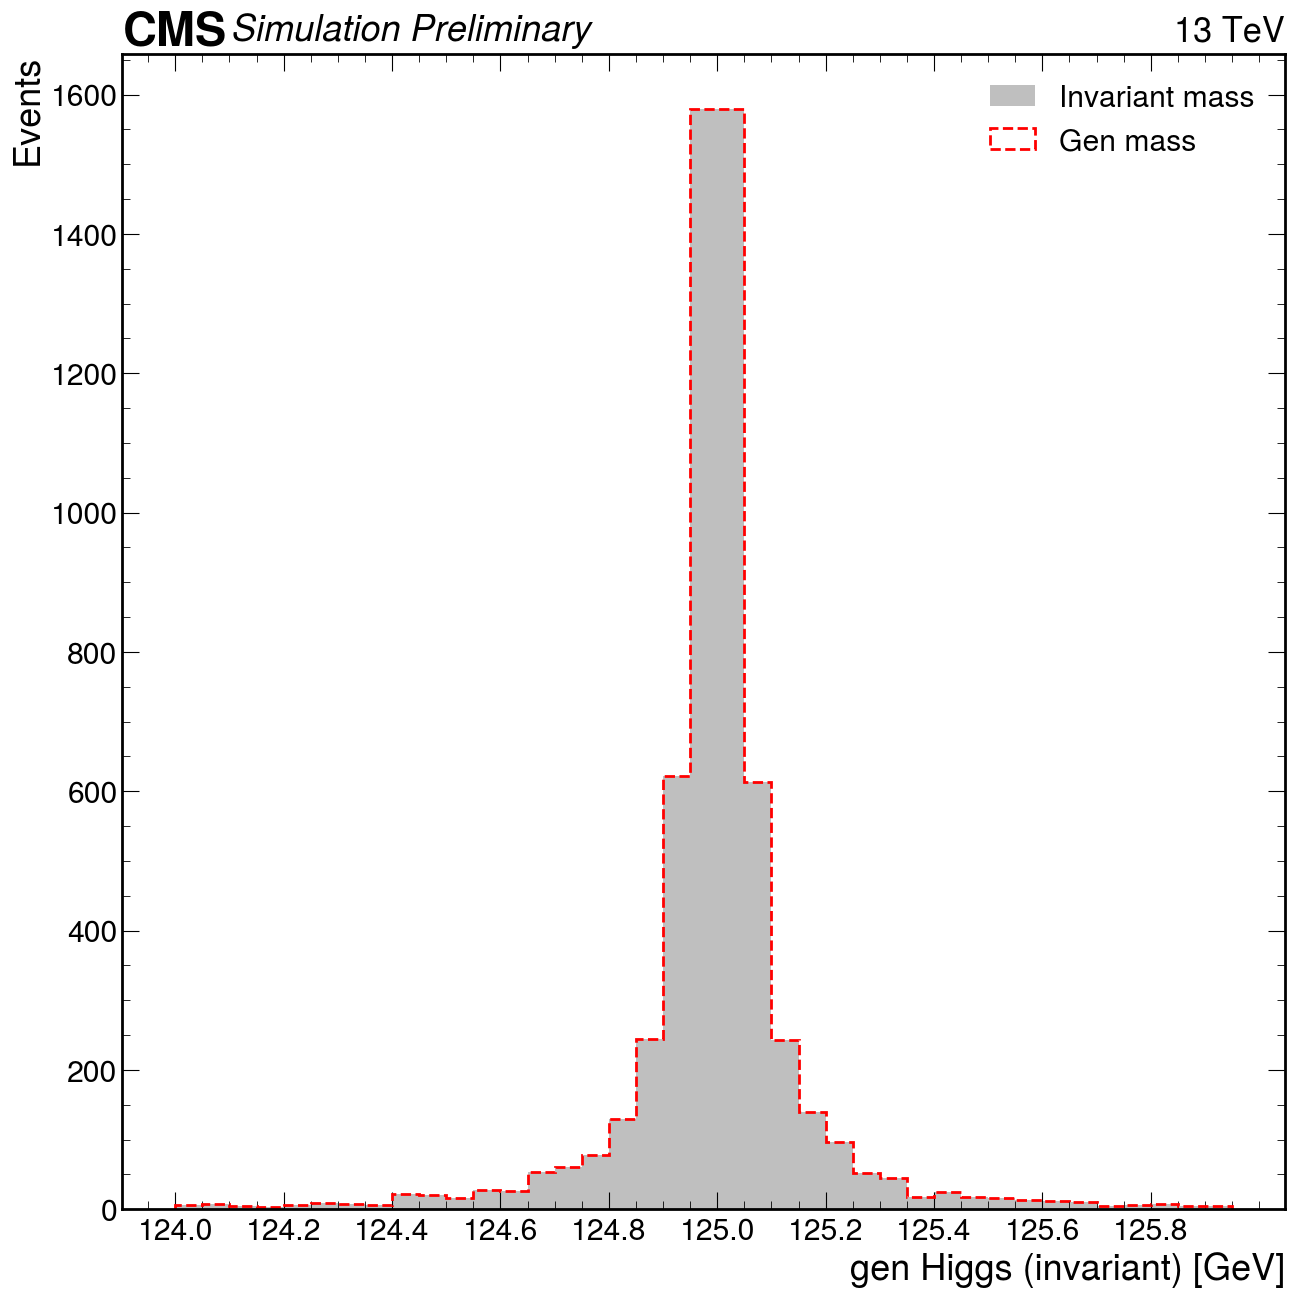

In [305]:
GenHiggs_invariant = RHTree.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs = RHTree.arrays(["GenHiggs"],"GenHiggs > -111",library="pd")['GenHiggs']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenHiggs_invariant,bins=np.arange(124,126,0.05),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenHiggs,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2, color='red',label="Gen mass")
plt.xticks(np.arange(124,126,0.2))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Higgs (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

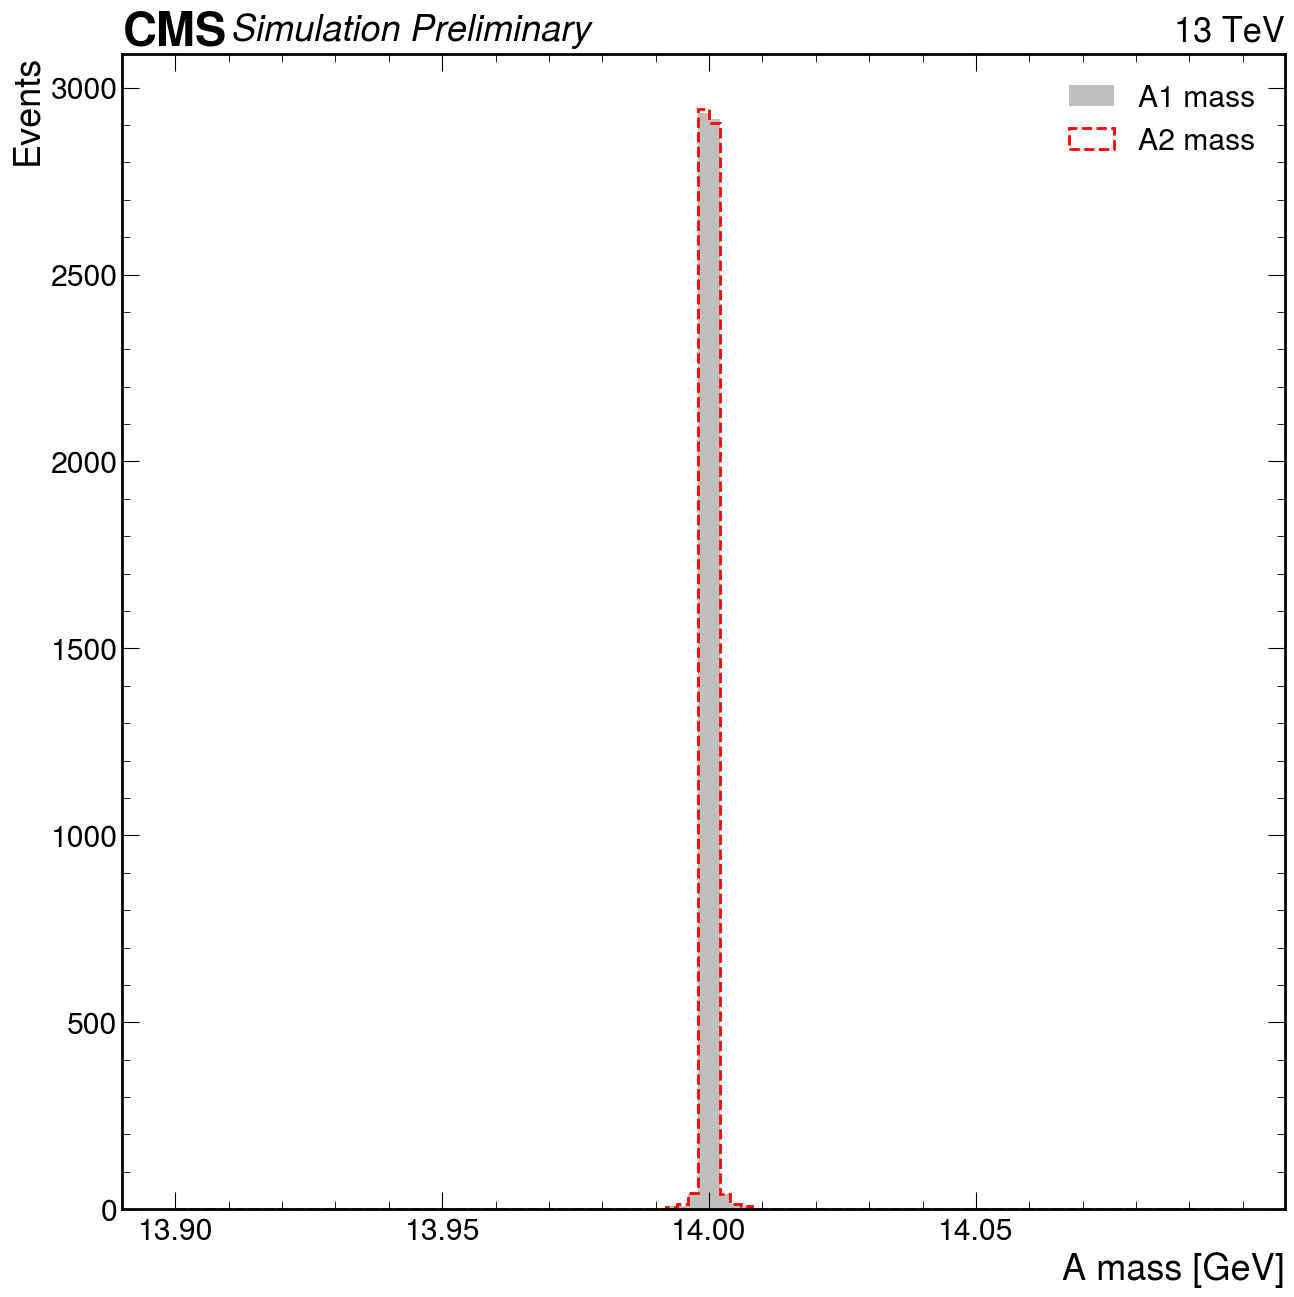

In [306]:
GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
GenA2_invariant = RHTree.arrays(["GenA2_inv"],"GenA2_inv > -111",library="pd")['GenA2_inv']
GenA2 = RHTree.arrays(["GenA2"],"GenA2 > -111",library="pd")['GenA2']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_invariant,bins=np.arange(mass-0.1,mass+0.1,0.002),color='grey',alpha=0.5,label="A1 mass")
plt.hist(GenA2,bins=np.arange(mass-0.1,mass+0.1,0.002),histtype='step',linestyle='--',linewidth=2, color='red',label="A2 mass")
plt.xticks(np.arange(mass-0.1,mass+0.1,0.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("A mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

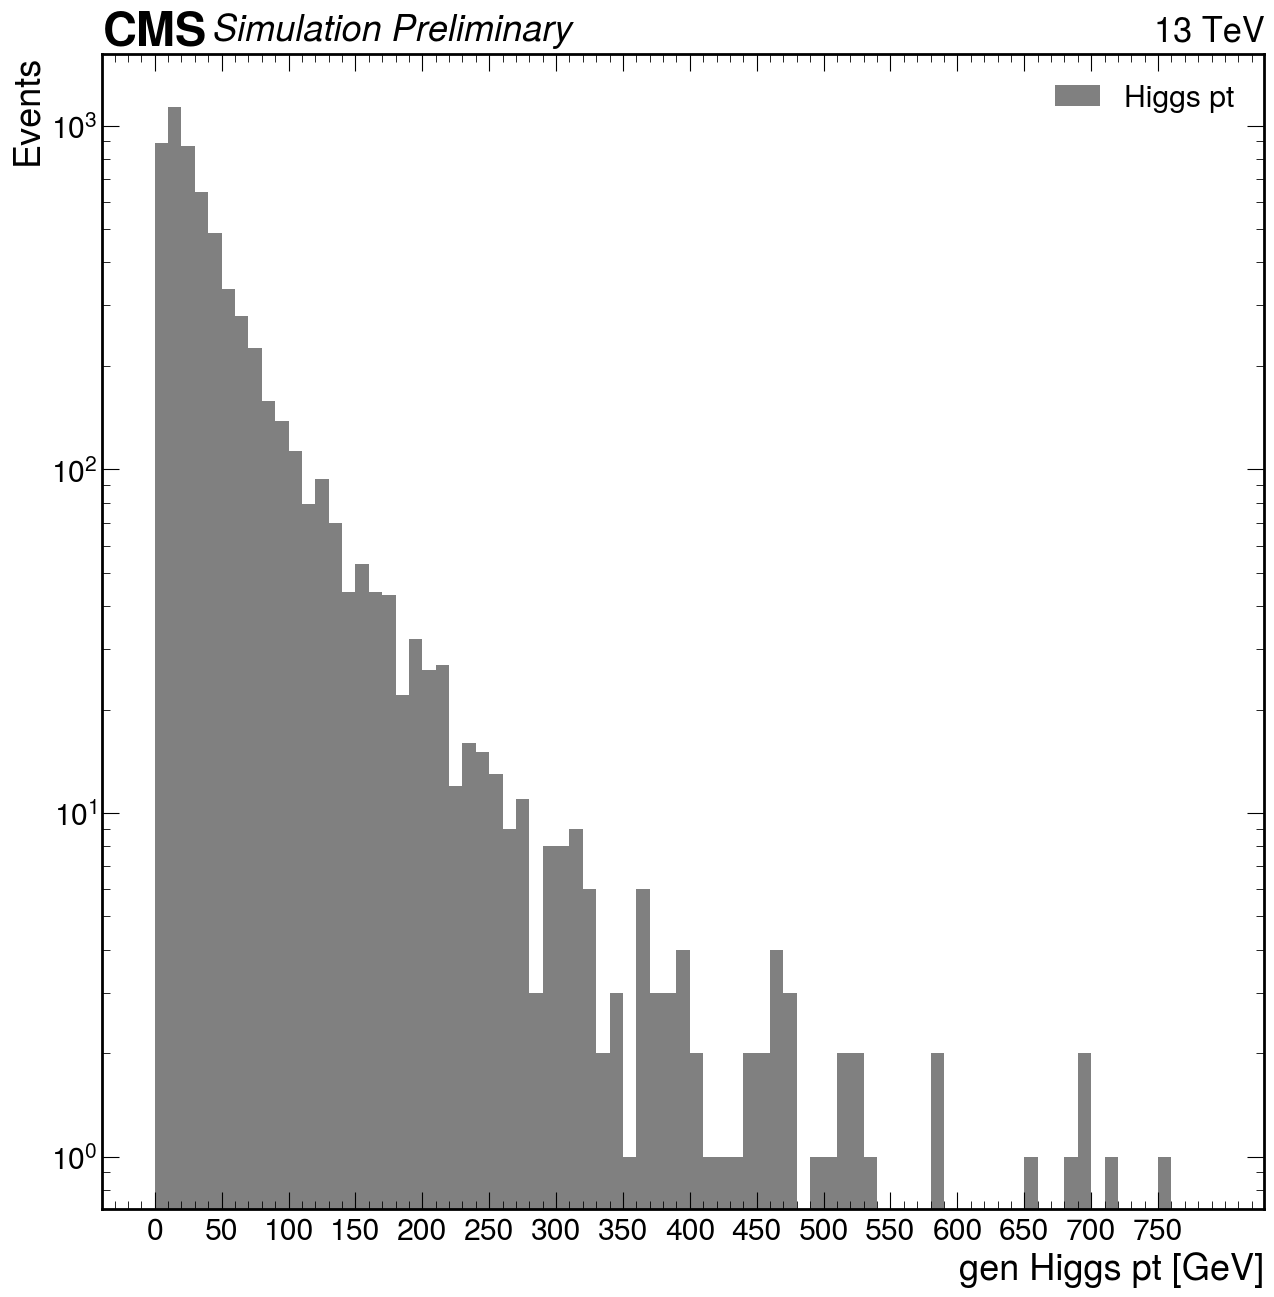

In [307]:
H_pt = RHTree.arrays(["H_pt"],"H_pt > -1",library="pd")['H_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(H_pt,bins=np.arange(0,800,10),color='grey',label="Higgs pt",log=True)
plt.xticks(np.arange(0,800,50))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Higgs pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

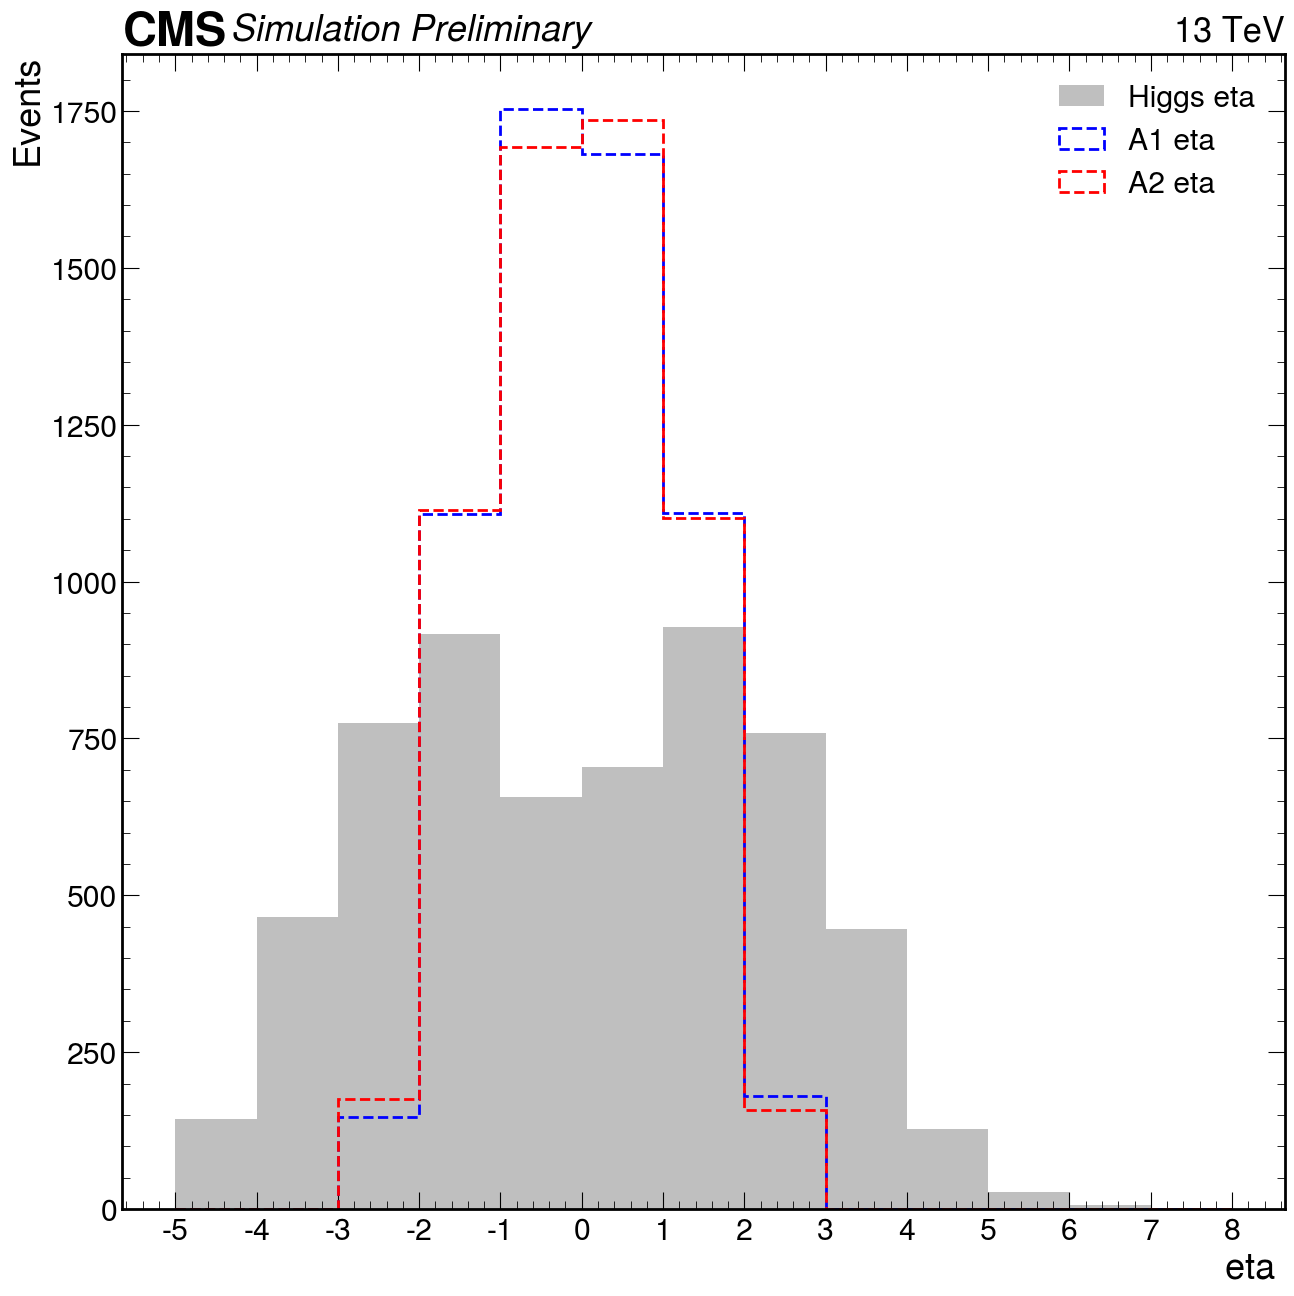

In [308]:
H_eta = RHTree.arrays(["H_eta"],"H_eta > -111",library="pd")['H_eta']
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
A2_eta = RHTree.arrays(["A2_eta"],"A2_eta > -111",library="pd")['A2_eta']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(H_eta,bins=np.arange(-5,9,1),color='grey',alpha=0.5,label="Higgs eta")
plt.hist(A1_eta,bins=np.arange(-5,9,1),histtype='step',linestyle='--',linewidth=2,color='b',label="A1 eta")
plt.hist(A2_eta,bins=np.arange(-5,9,1),histtype='step',linestyle='--',linewidth=2,color='r',label="A2 eta")
plt.xticks(np.arange(-5,9,1))
plt.legend()
plt.ylabel("Events")
plt.xlabel("eta ")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_A1_A2_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

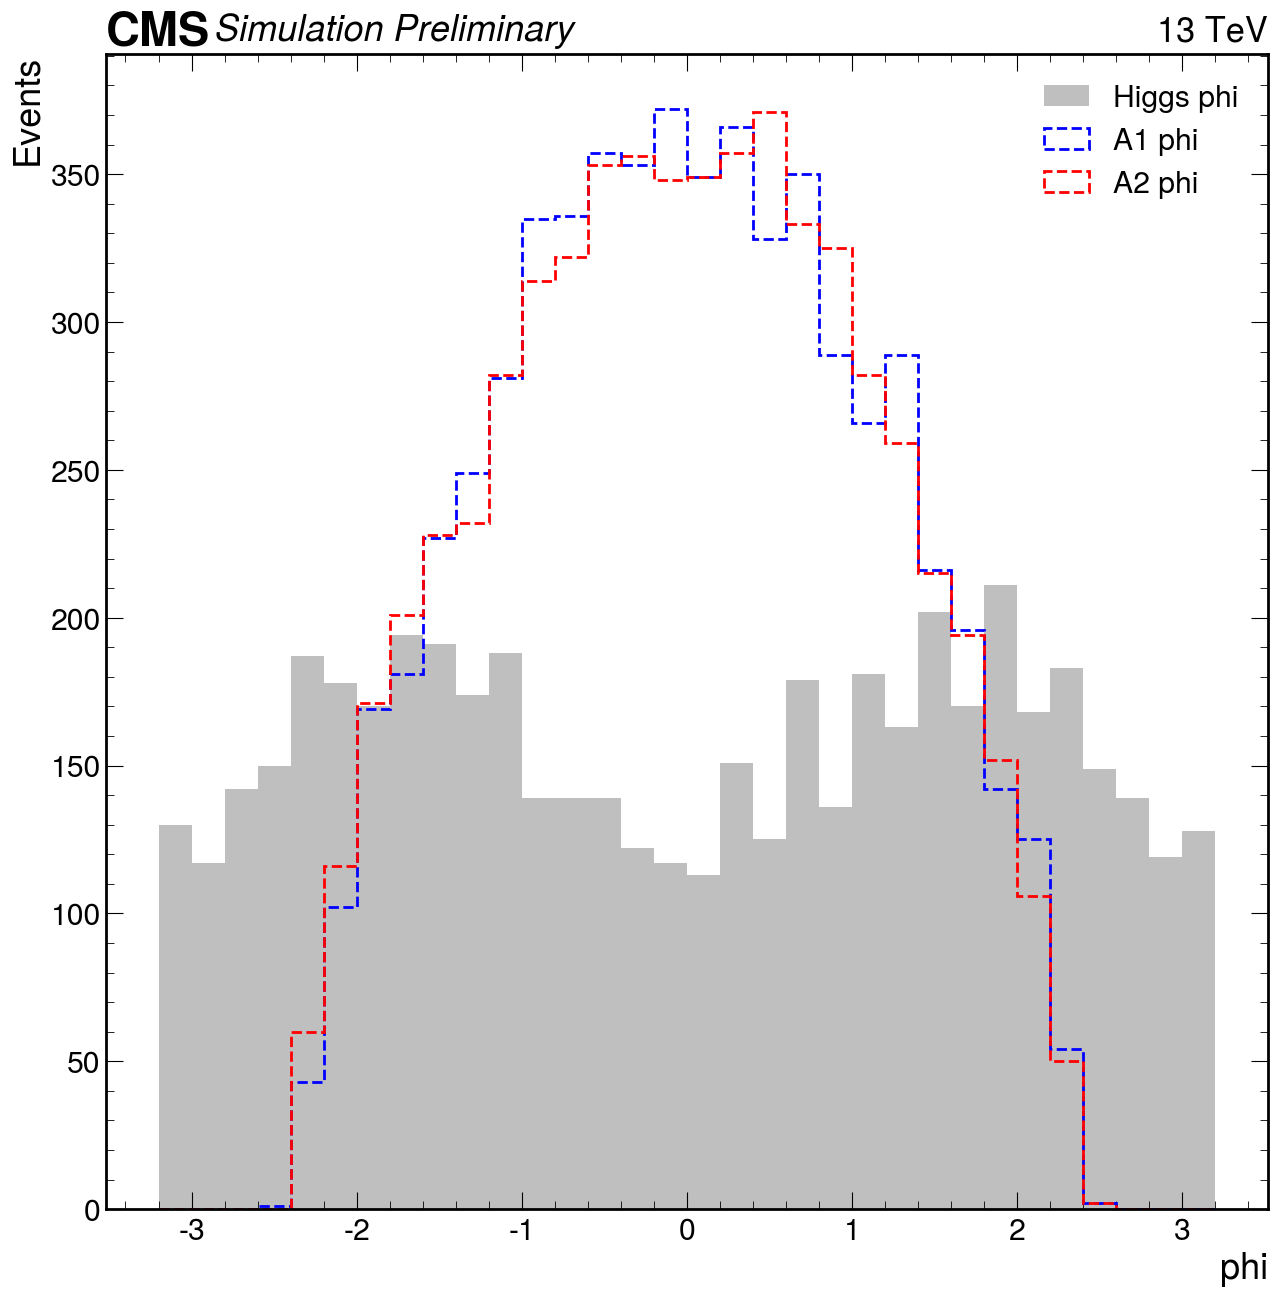

In [309]:
H_phi = RHTree.arrays(["H_phi"],"H_phi > -111",library="pd")['H_phi']
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
A2_phi = RHTree.arrays(["A2_phi"],"A2_phi > -111",library="pd")['A2_phi']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(H_eta,bins=np.arange(-3.2,3.4,.2),color='grey',alpha=0.5,label="Higgs phi")
plt.hist(A1_eta,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="A1 phi")
plt.hist(A2_eta,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="A2 phi")
# plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("phi")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_A1_A2_phi_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

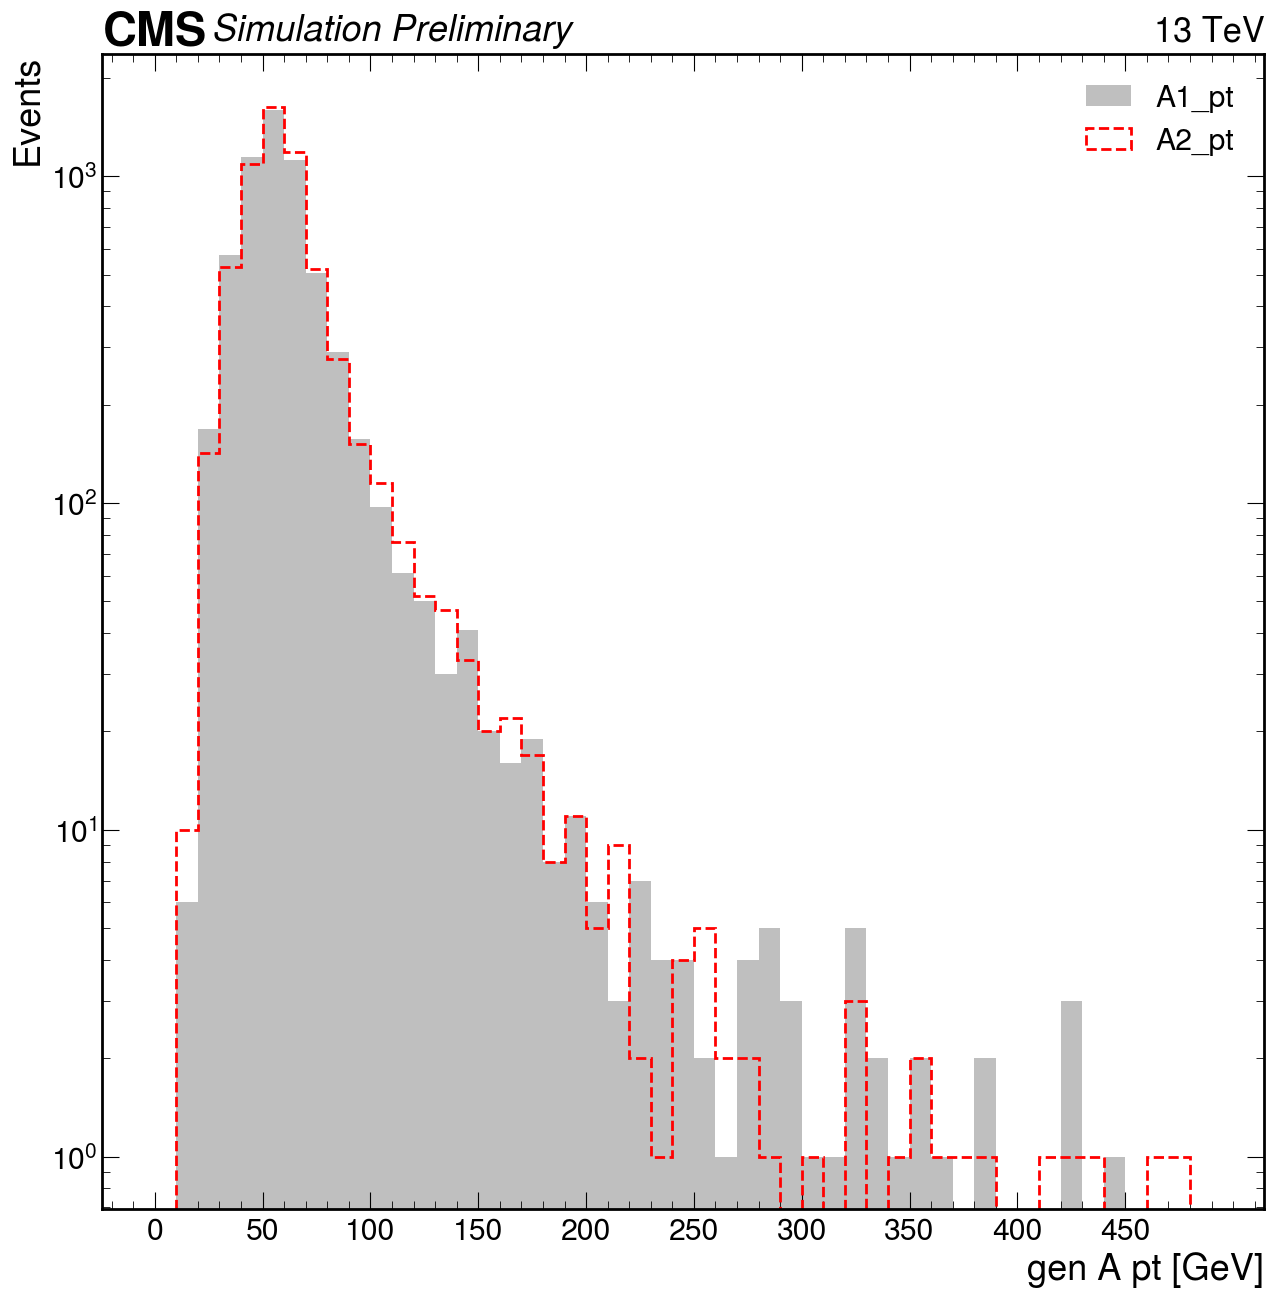

In [310]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A2_pt = RHTree.arrays(["A2_pt"],"A2_pt > -111",library="pd")['A2_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_pt,bins=np.arange(0,500,10),color='grey',alpha=0.5,label="A1_pt",log=True)
plt.hist(A2_pt,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2, color='red',label="A2_pt",log=True)
plt.xticks(np.arange(0,500,50))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

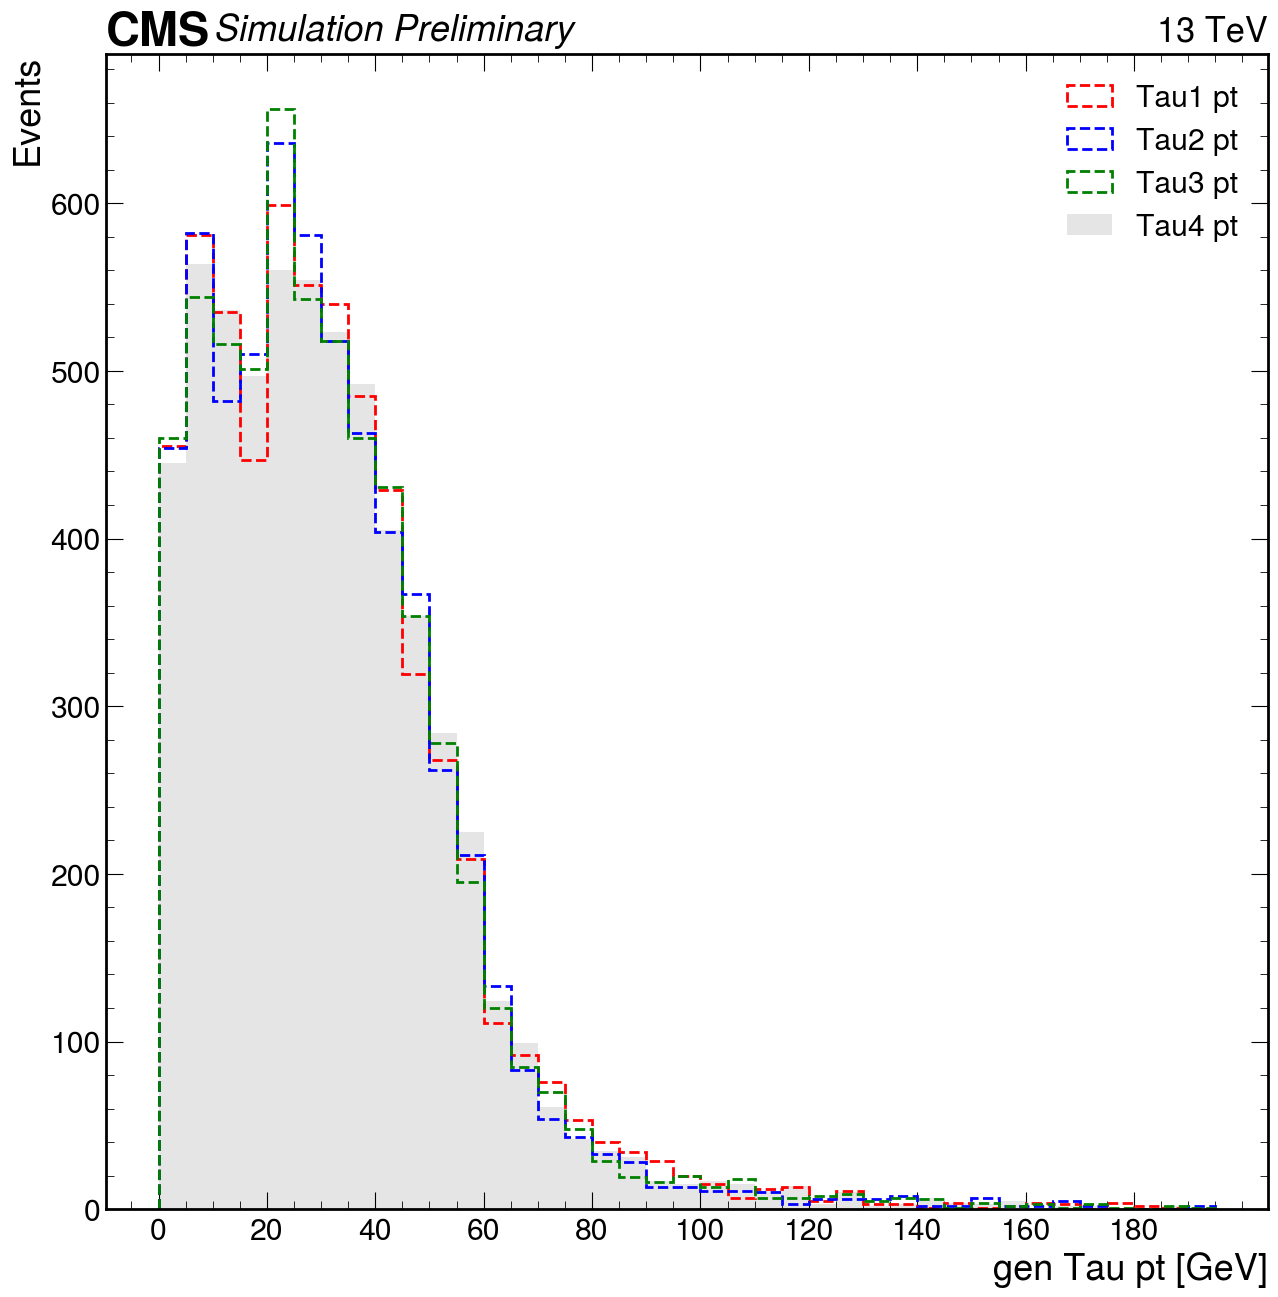

In [311]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau3_pt = RHTree.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau4_pt = RHTree.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 pt")
plt.hist(Tau3_pt,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2, color='g',label="Tau3 pt")
plt.hist(Tau4_pt,bins=np.arange(0,200,5), color='grey',alpha=0.2,label="Tau4 pt")
plt.xticks(np.arange(0,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

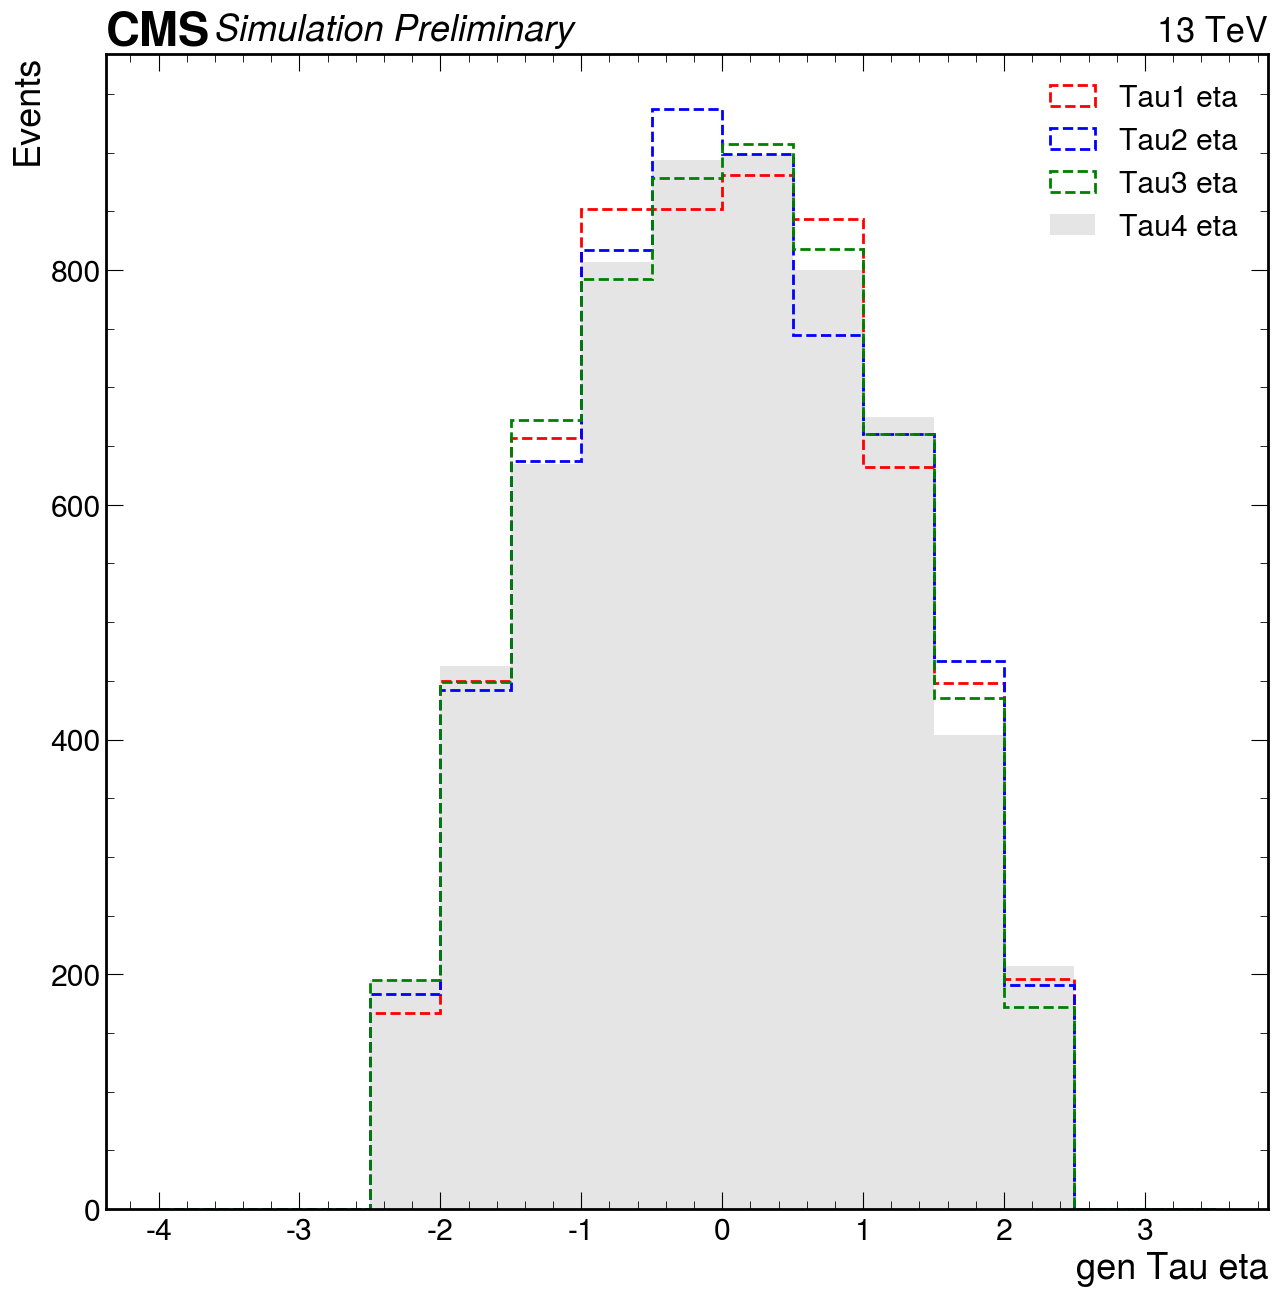

In [312]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
Tau2_eta = RHTree.arrays(["Tau2_eta"],"Tau2_eta > -111",library="pd")['Tau2_eta']
Tau3_eta = RHTree.arrays(["Tau3_eta"],"Tau3_eta > -111",library="pd")['Tau3_eta']
Tau4_eta = RHTree.arrays(["Tau4_eta"],"Tau4_eta > -111",library="pd")['Tau4_eta']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_eta,bins=np.arange(-4,4,.5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 eta")
plt.hist(Tau2_eta,bins=np.arange(-4,4,.5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 eta")
plt.hist(Tau3_eta,bins=np.arange(-4,4,.5),histtype='step',linestyle='--',linewidth=2, color='g',label="Tau3 eta")
plt.hist(Tau4_eta,bins=np.arange(-4,4,.5), color='grey',alpha=0.2,label="Tau4 eta")
# plt.xticks(np.arange(-4,4,.5))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau eta")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

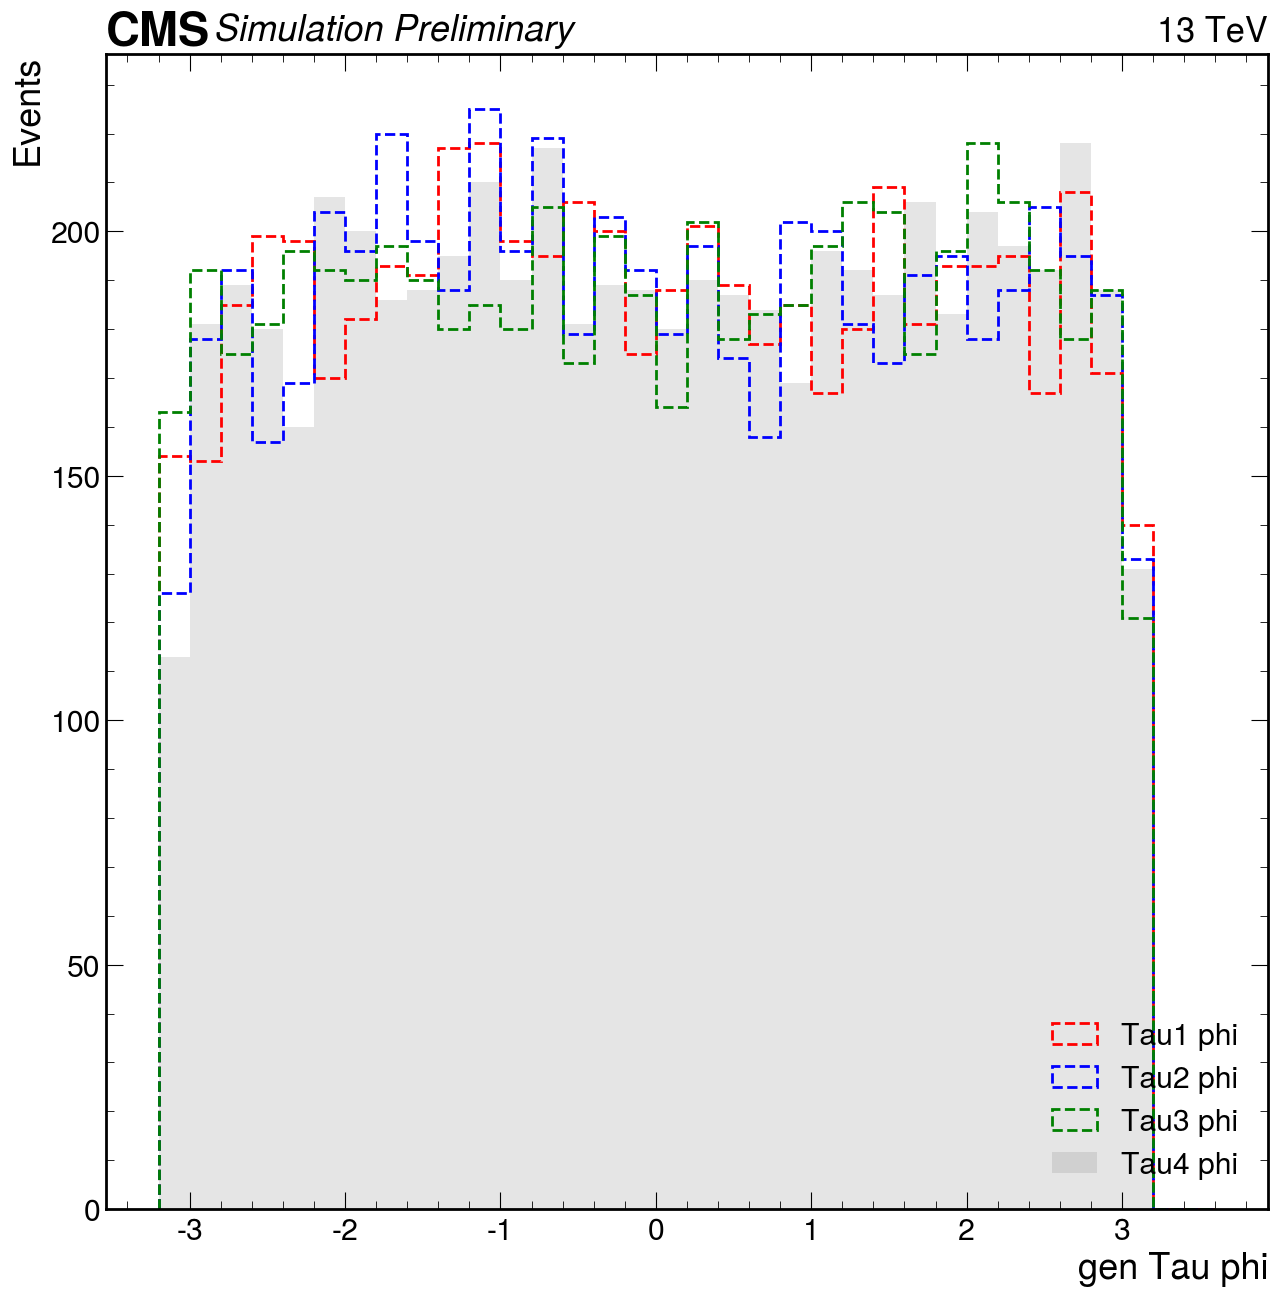

In [313]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
Tau2_phi = RHTree.arrays(["Tau2_phi"],"Tau2_phi > -111",library="pd")['Tau2_phi']
Tau3_phi = RHTree.arrays(["Tau3_phi"],"Tau3_phi > -111",library="pd")['Tau3_phi']
Tau4_phi = RHTree.arrays(["Tau4_phi"],"Tau4_phi > -111",library="pd")['Tau4_phi']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_phi,bins=np.arange(-3.2,3.8,.2),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 phi")
plt.hist(Tau2_phi,bins=np.arange(-3.2,3.8,.2),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 phi")
plt.hist(Tau3_phi,bins=np.arange(-3.2,3.8,.2),histtype='step',linestyle='--',linewidth=2, color='g',label="Tau3 phi")
plt.hist(Tau4_phi,bins=np.arange(-3.2,3.8,.2), color='grey',alpha=0.2,label="Tau4 phi")
# plt.xticks(np.arange(-3.2,3.8,.5))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau phi")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_phi_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

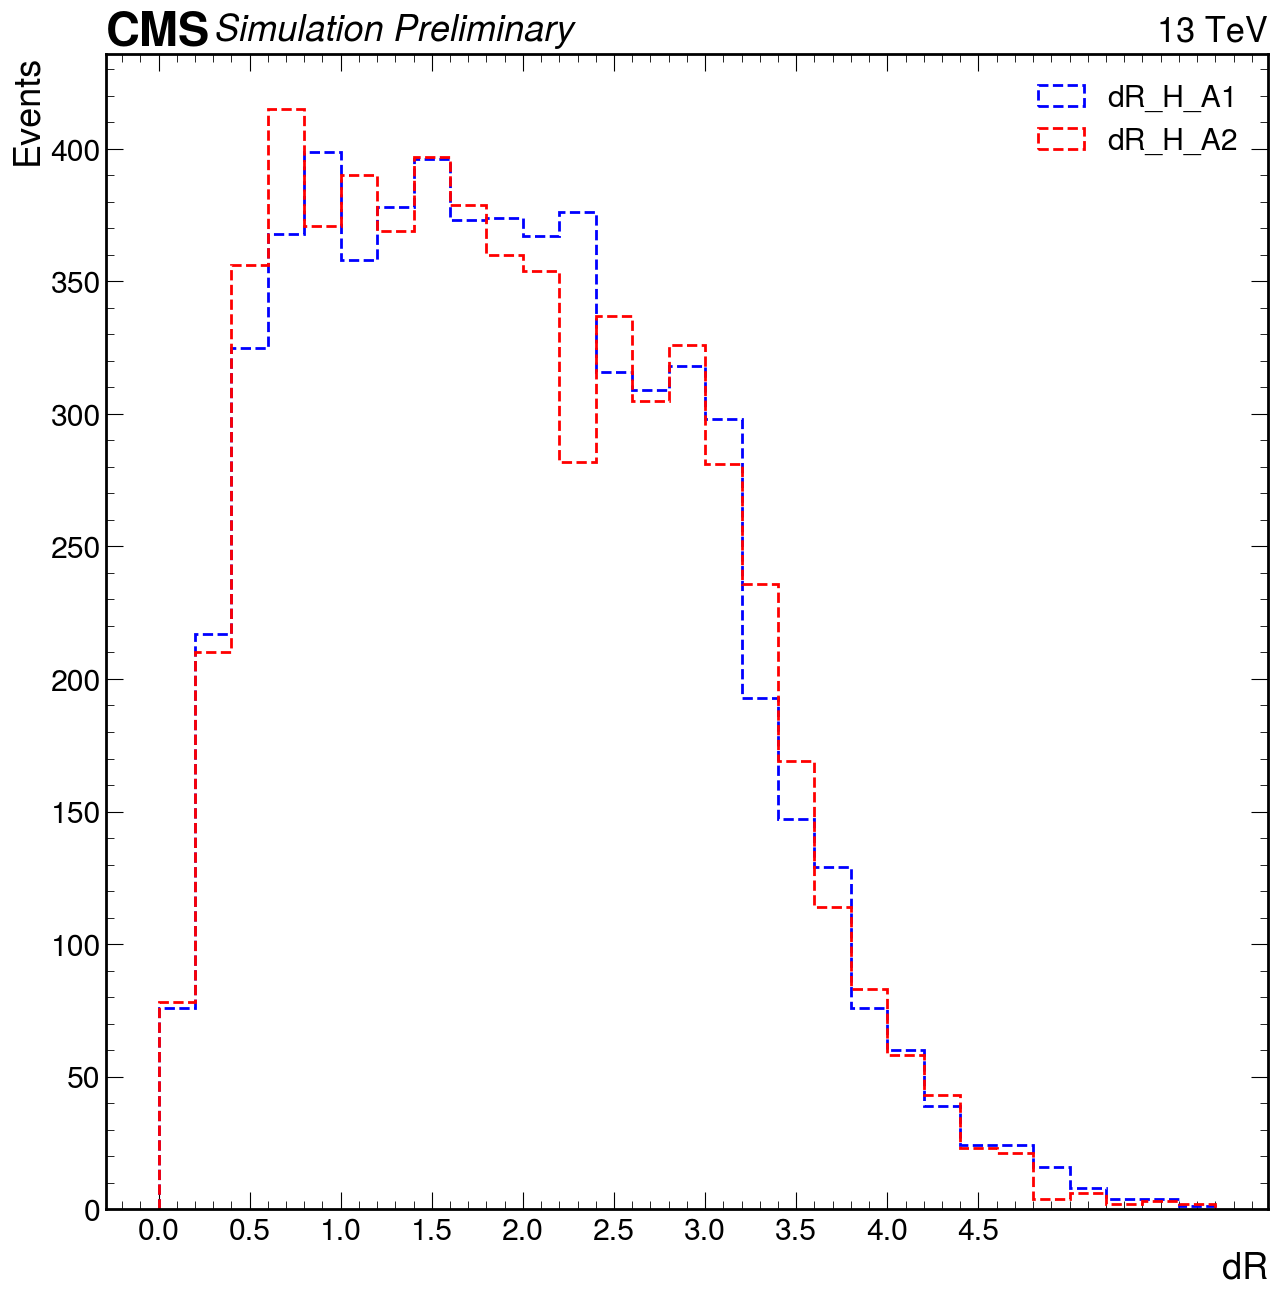

In [314]:
dR_H_A1 = RHTree.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A2 = RHTree.arrays(["dR_H_A2"],"dR_H_A2 > -111",library="pd")['dR_H_A2']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_H_A1,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_H_A1")
plt.hist(dR_H_A2,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_H_A2")
plt.xticks(np.arange(0,5,.5))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_H_A_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

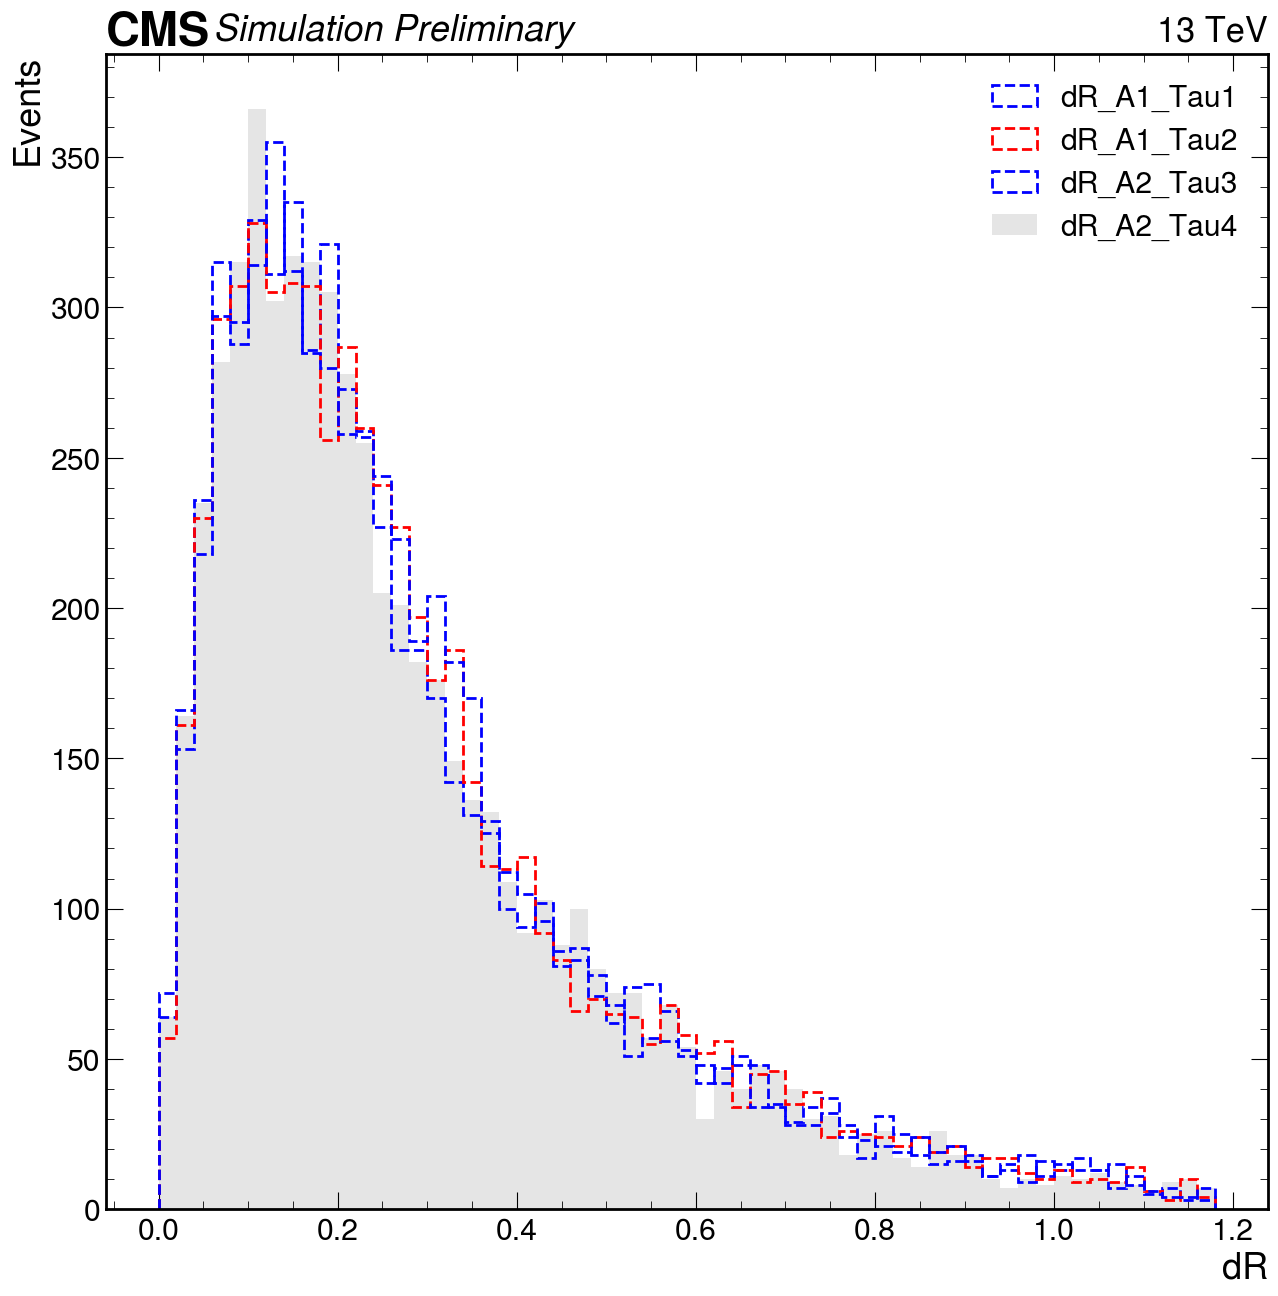

In [315]:
dR_A1_Tau1 = RHTree.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau2 = RHTree.arrays(["dR_A1_Tau2"],"dR_A1_Tau2 > -111",library="pd")['dR_A1_Tau2']
dR_A2_Tau3 = RHTree.arrays(["dR_A2_Tau3"],"dR_A2_Tau3 > -111",library="pd")['dR_A2_Tau3']
dR_A2_Tau4 = RHTree.arrays(["dR_A2_Tau4"],"dR_A2_Tau4 > -111",library="pd")['dR_A2_Tau4']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_A1_Tau1,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A1_Tau1")
plt.hist(dR_A1_Tau2,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_A1_Tau2")
plt.hist(dR_A2_Tau3,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A2_Tau3")
plt.hist(dR_A2_Tau4,bins=np.arange(0,1.2,.02), color='grey',alpha=0.2,label="dR_A2_Tau4")
# plt.xticks(np.arange(0,.6,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

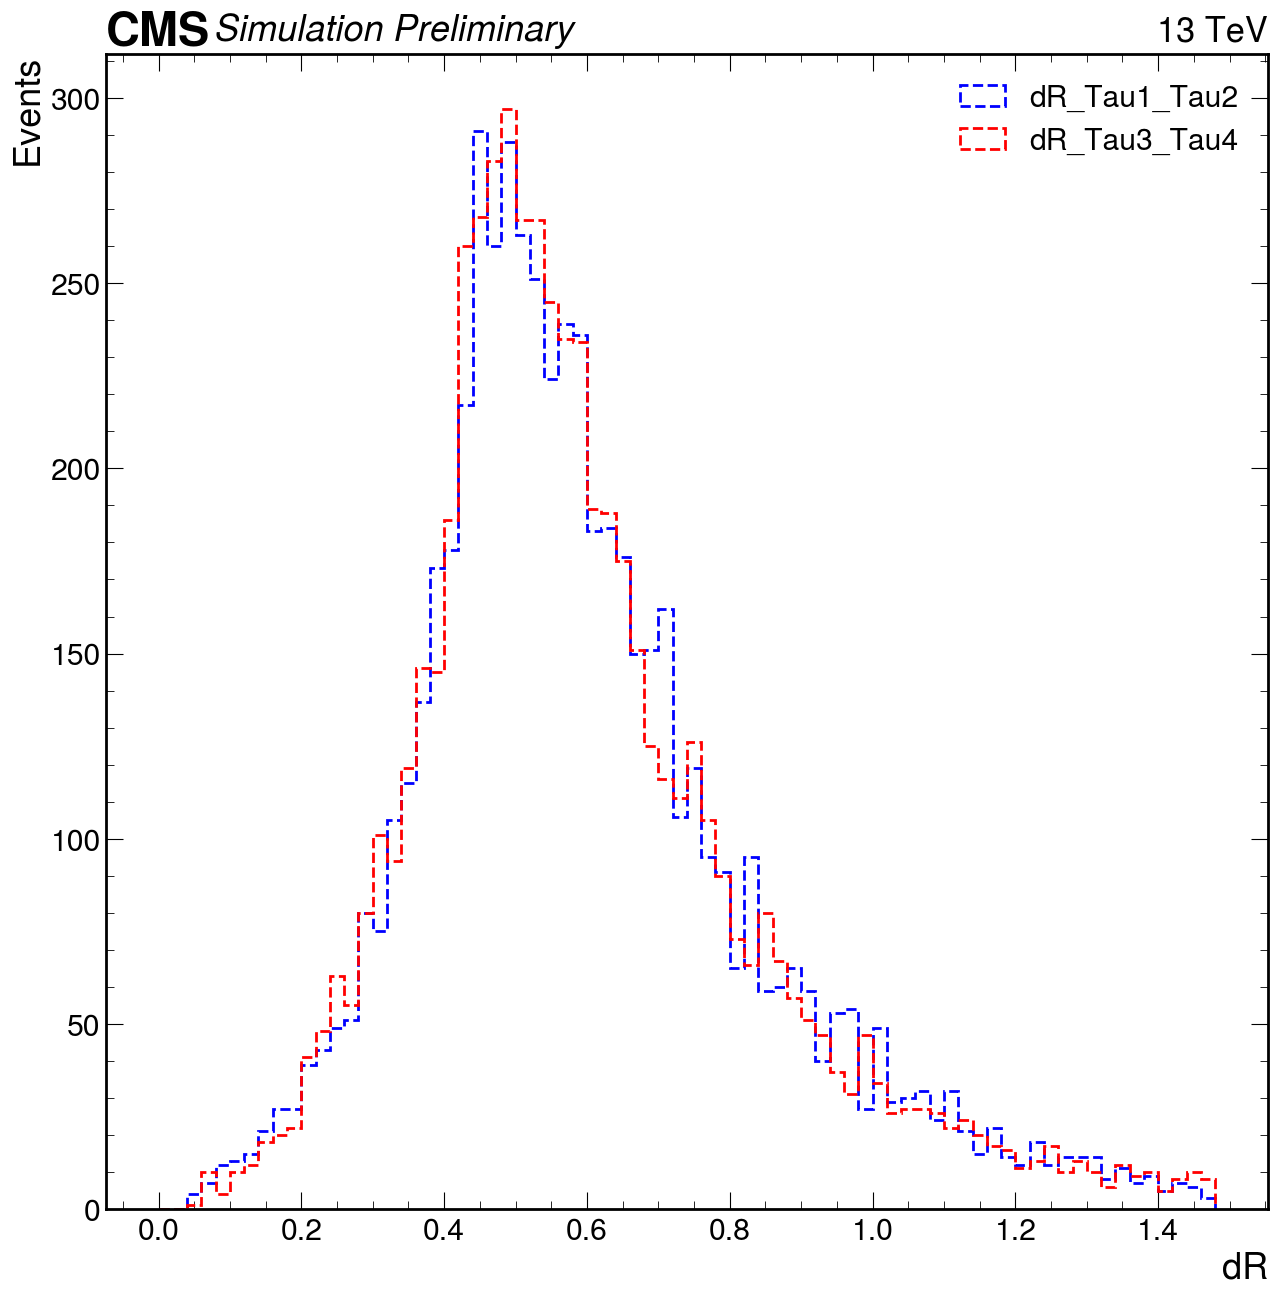

In [316]:
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau3_Tau4 = RHTree.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_Tau1_Tau2")
plt.hist(dR_Tau3_Tau4,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_Tau3_Tau4")
# plt.xticks(np.arange(0,.8,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

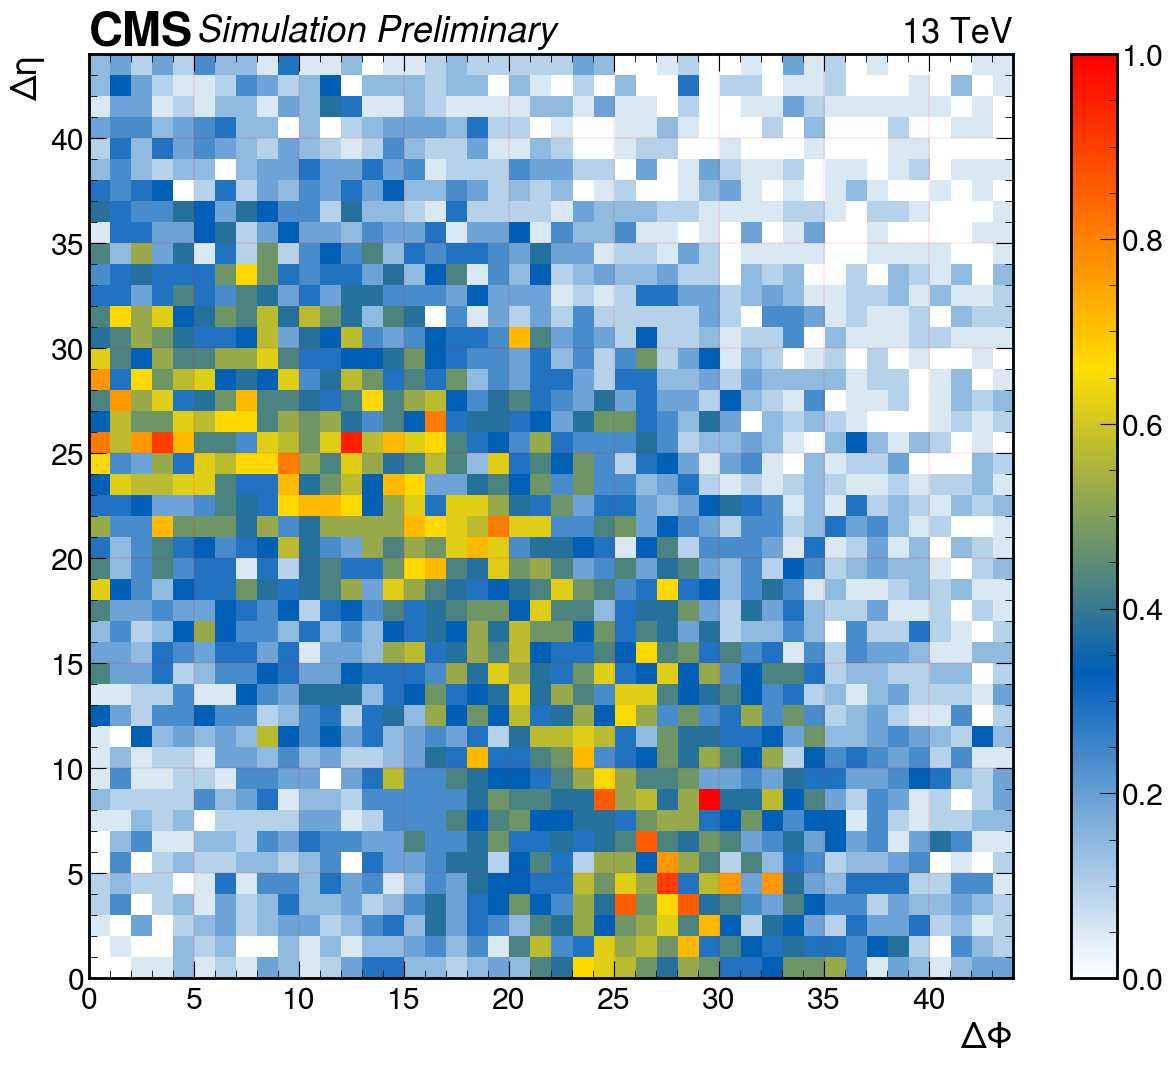

In [317]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
Tau3_Tau4_dphi = RHTree.arrays(["Tau3_Tau4_dphi"],"Tau3_Tau4_dphi > -111",library="pd")['Tau3_Tau4_dphi']
Tau3_Tau4_deta = RHTree.arrays(["Tau3_Tau4_deta"],"Tau3_Tau4_deta > -111",library="pd")['Tau3_Tau4_deta']



bins = np.arange(0,45,1)
fig, ax = plt.subplots(figsize=(15, 12))
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=.5)
crystal_eta = np.concatenate((Tau3_Tau4_dphi , Tau1_Tau2_dphi)) / 0.0174
crystal_phi = np.concatenate((Tau3_Tau4_deta , Tau1_Tau2_deta)) / 0.0174

H, xedges, yedges = np.histogram2d(crystal_eta, crystal_phi, bins =[bins, bins], density = True)
H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = ax.imshow(H_normalized, extent=extent, cmap=cms_cmap, interpolation='none',origin ='lower', norm=norm)
plt.colorbar(im, ax=ax)
# plt.xticks(np.arange(0,25,1))
# plt.yticks(np.arange(0,25,1))
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")

plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/mass_pt_2D_hist_with_crystal_number.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

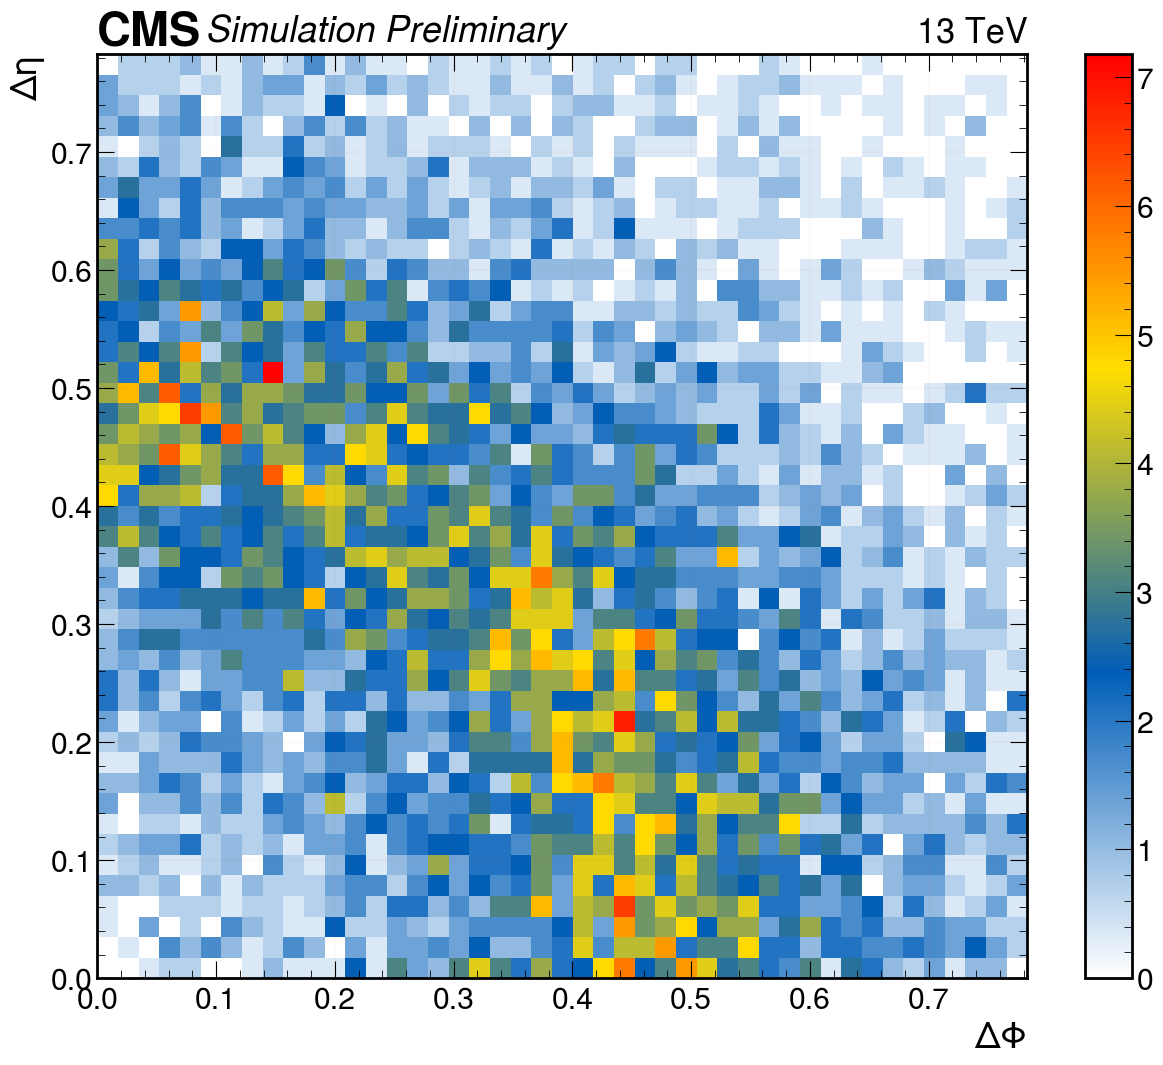

In [318]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
Tau3_Tau4_dphi = RHTree.arrays(["Tau3_Tau4_dphi"],"Tau3_Tau4_dphi > -111",library="pd")['Tau3_Tau4_dphi']
Tau3_Tau4_deta = RHTree.arrays(["Tau3_Tau4_deta"],"Tau3_Tau4_deta > -111",library="pd")['Tau3_Tau4_deta']
fig, ax = plt.subplots(figsize=(15, 12))
h=plt.hist2d(np.concatenate((Tau3_Tau4_dphi , Tau1_Tau2_dphi)), np.concatenate((Tau3_Tau4_deta , Tau1_Tau2_deta)), bins=[np.arange(0, .8, 0.0174), np.arange(0, .8, 0.0174)], cmap=cms_cmap, density=True)
plt.colorbar()
# Set tick parameters to show ticks without labels
# plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False, labeltop=False)
# plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=False, labelright=False)
# plt.xticks(h[1])
# plt.yticks(h[2])
# plt.gca().set_xticks(h[1], minor=False)
# plt.gca().set_yticks(h[2], minor=False)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.05)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau3_Tau4_dphi_deta_2D_hist.png'%(out_dir), bbox_inches='tight', dpi=300, facecolor="w")
plt.show()


In [319]:
# Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
# Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
# fig, ax = plt.subplots(figsize=(15,12))
# plt.hist2d( Tau1_Tau2_dphi, Tau1_Tau2_deta,bins=[np.arange(0,.44,0.0174),np.arange(0,.44,0.0174)],cmap=cms_cmap, density=True)
# plt.colorbar()
# plt.xticks(np.arange(0,.44,0.0174),size=5)
# plt.yticks(np.arange(0,.44,0.0174),size=12)
# plt.ylabel("\u0394\u03B7")
# plt.xlabel("\u0394\u03A6")
# plt.grid(color='r', linestyle='--', linewidth=.2)
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/Tau1_Tau2_dphi_deta_2D_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
# plt.show()

In [320]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
# out_dir=f'data/plot_H_AA_4Tau_M_{mass_tag}_signal_kinematics_with_trigger'
out_dir='data/plot_H_AA_4Tau_combined_signal_kinematics'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [321]:
file3p7 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M3p7.root")
RHTree3p7 = file3p7["RHTree"]

file4 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M4.root")
RHTree4 = file4["RHTree"]

file5 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M5.root")
RHTree5 = file5["RHTree"]

file6 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M6.root")
RHTree6 = file6["RHTree"]

file8 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M8.root")
RHTree8 = file8["RHTree"]

file10 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M10.root")
RHTree10 = file10["RHTree"]

file12 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M12.root")
RHTree12 = file12["RHTree"]

file14 = uproot.open(f"../analysis/gen_information_H_AA_4Tau/CMSSW_10_6_20/src/Gen/HtoAAto4tau_merged_output_M14.root")
RHTree14 = file14["RHTree"]



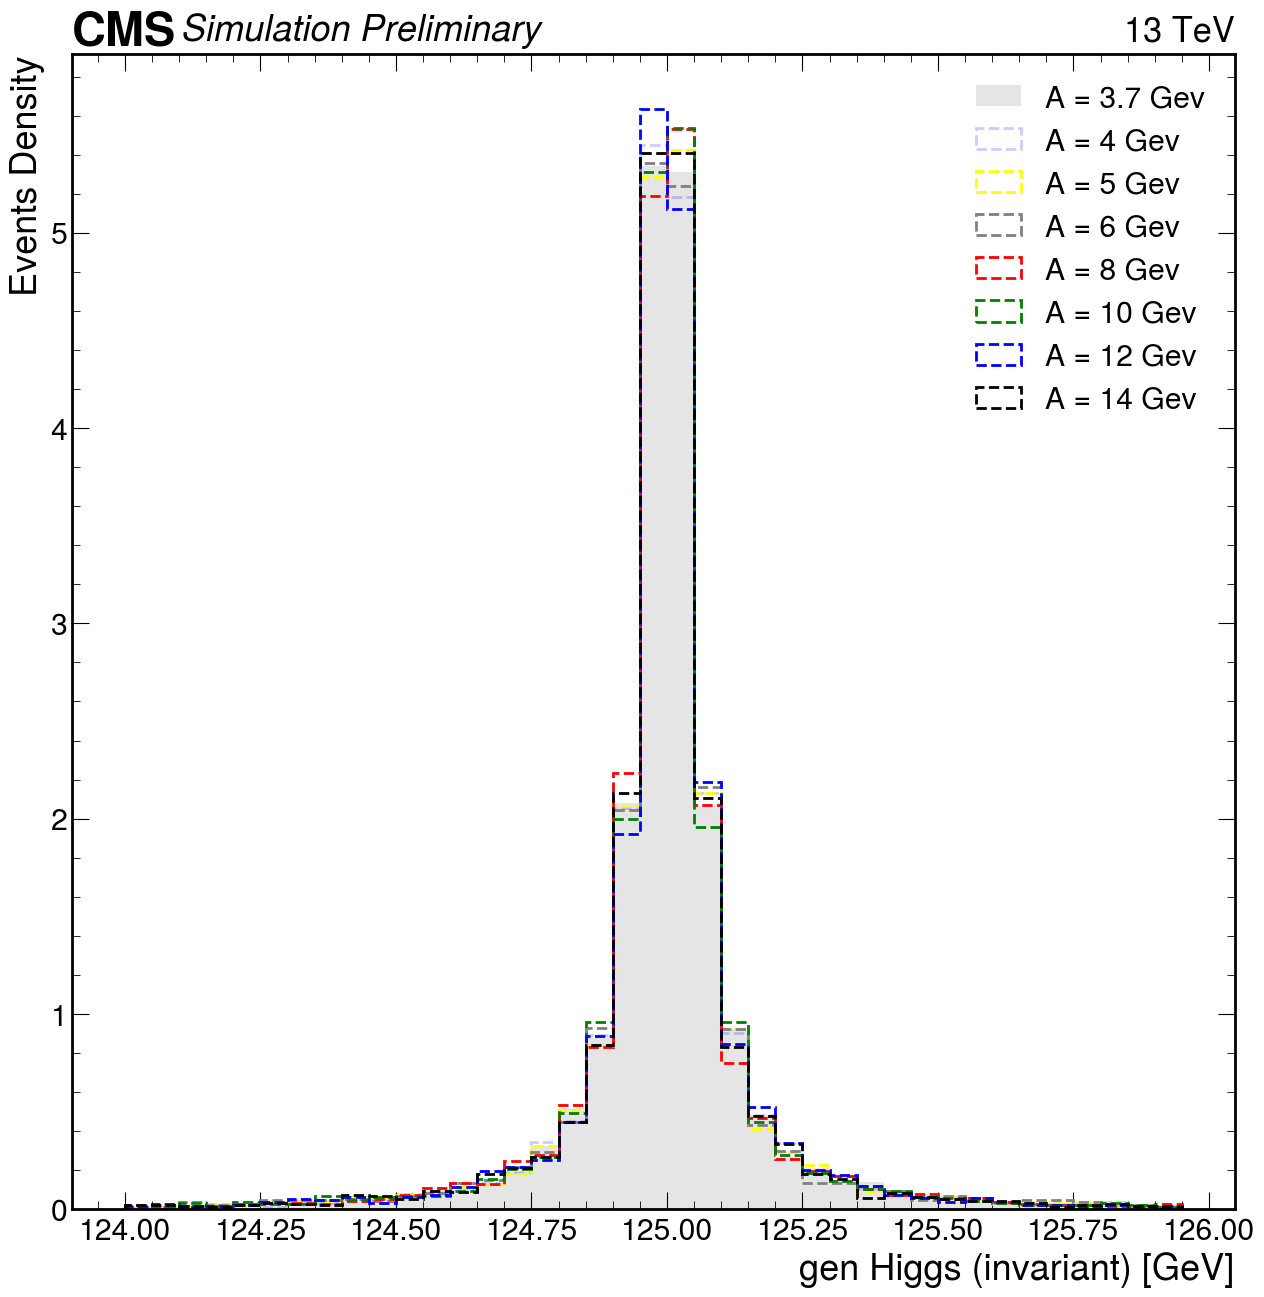

In [322]:
GenHiggs_invariant3p7 = RHTree3p7.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs_invariant4 = RHTree4.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs_invariant5 = RHTree5.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs_invariant6 = RHTree6.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs_invariant8 = RHTree8.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs_invariant10 = RHTree10.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs_invariant12 = RHTree12.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs_invariant14 = RHTree14.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenHiggs_invariant3p7,bins=np.arange(124,126,0.05),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(GenHiggs_invariant4,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(GenHiggs_invariant5,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(GenHiggs_invariant6,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(GenHiggs_invariant8,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(GenHiggs_invariant10,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(GenHiggs_invariant12,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(GenHiggs_invariant14,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

# plt.xticks(np.arange(124,126,0.2))
plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Higgs (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

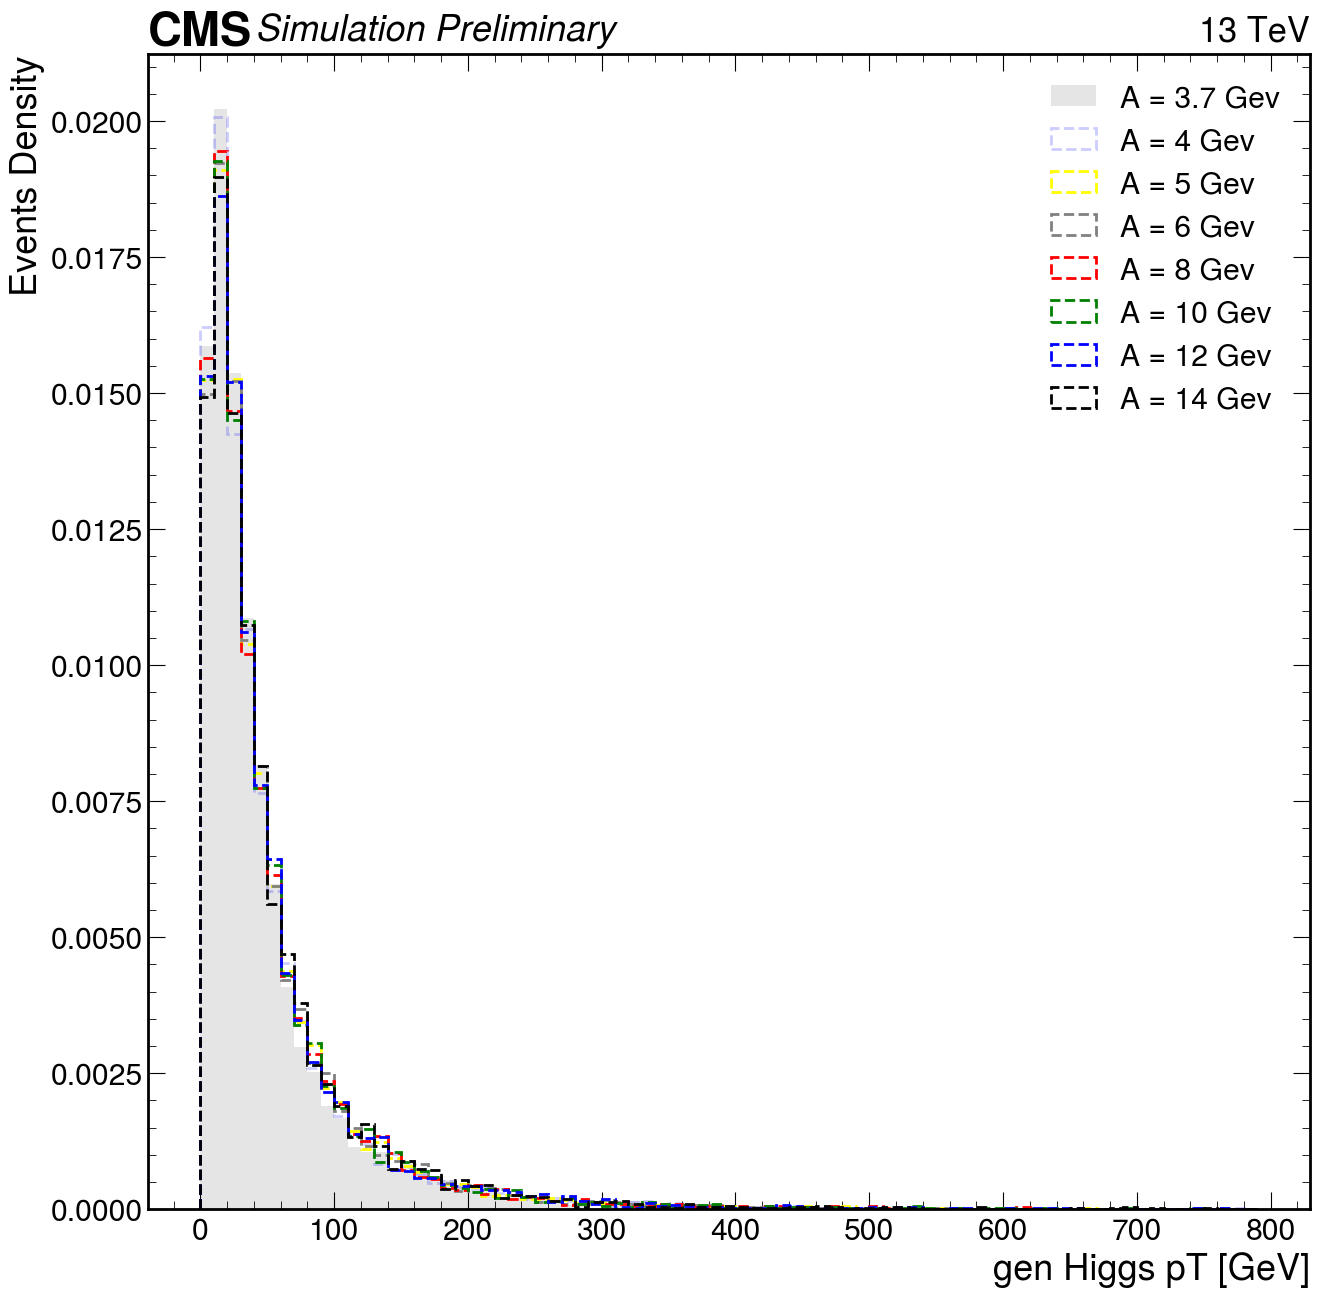

In [323]:
H_pt3p7 = RHTree3p7.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
H_pt4 = RHTree4.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
H_pt5 = RHTree5.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
H_pt6 = RHTree6.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
H_pt8 = RHTree8.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
H_pt10 = RHTree10.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
H_pt12 = RHTree12.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']
H_pt14 = RHTree14.arrays(["H_pt"],"H_pt > -111",library="pd")['H_pt']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(H_pt3p7,bins=np.arange(0,800,10),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(H_pt4,bins=np.arange(0,800,10),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(H_pt5,bins=np.arange(0,800,10),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(H_pt6,bins=np.arange(0,800,10),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(H_pt8,bins=np.arange(0,800,10),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(H_pt10,bins=np.arange(0,800,10),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(H_pt12,bins=np.arange(0,800,10),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(H_pt14,bins=np.arange(0,800,10),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)



plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Higgs pT [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_pt.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

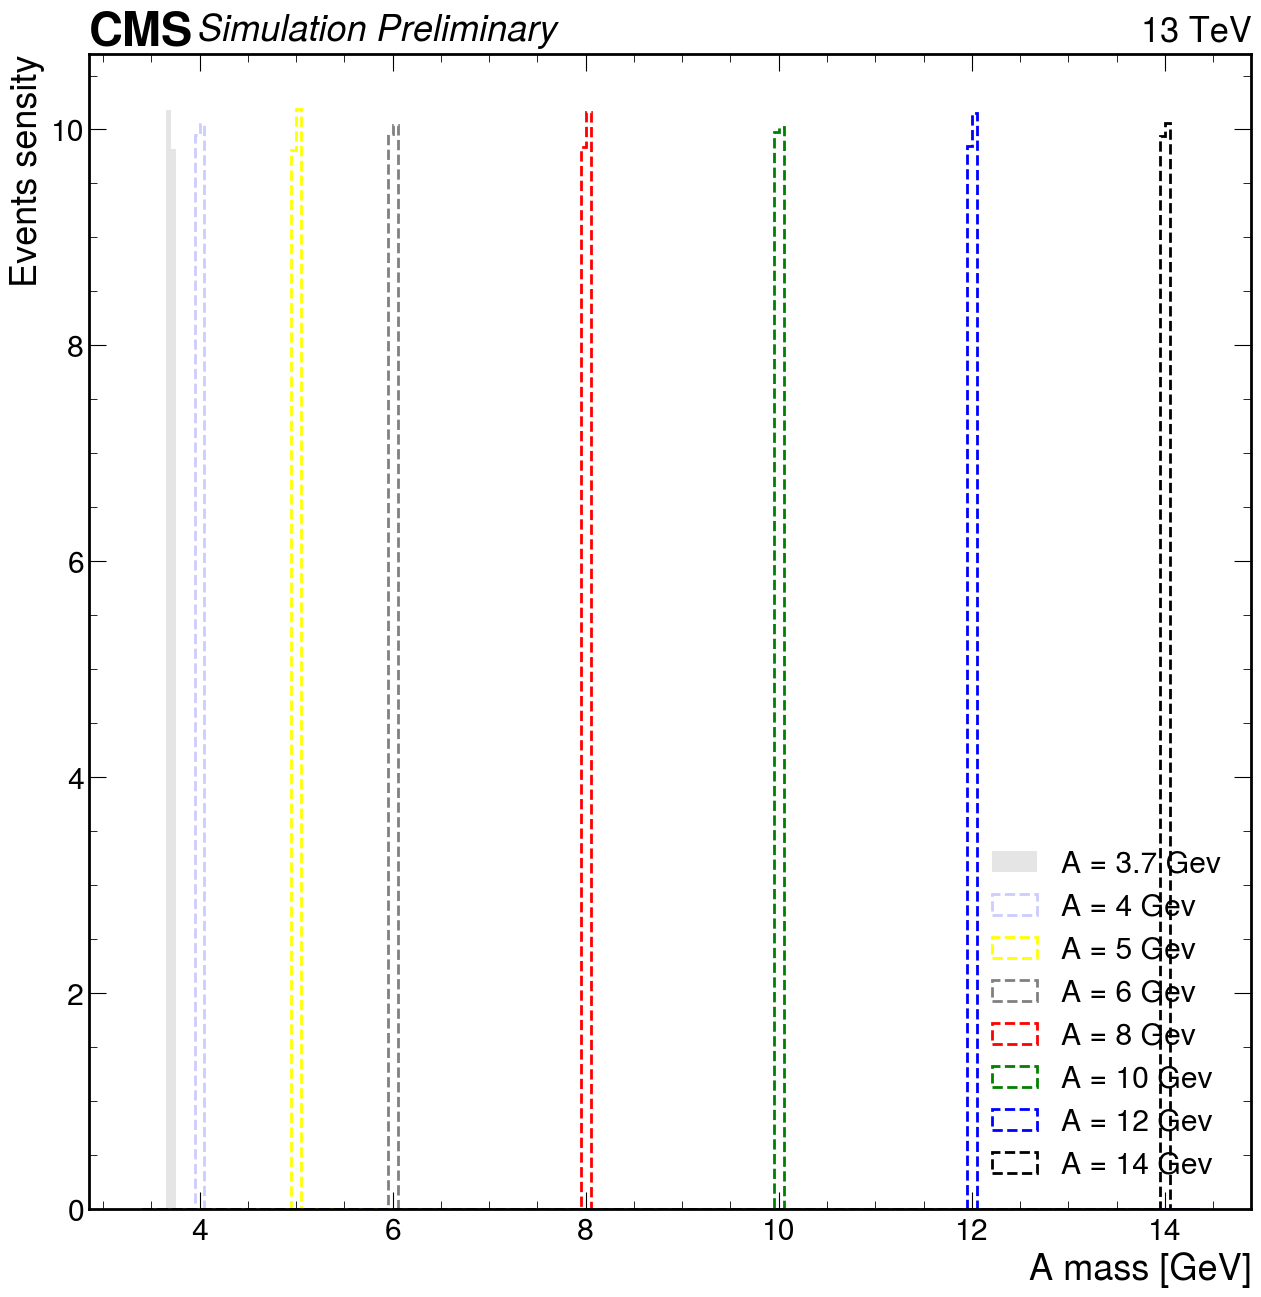

In [324]:
GenA1_inv3p7 = RHTree3p7.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1_inv4 = RHTree4.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1_inv5 = RHTree5.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1_inv6 = RHTree6.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1_inv8 = RHTree8.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1_inv10 = RHTree10.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1_inv12 = RHTree12.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1_inv14 = RHTree14.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_inv3p7,bins=np.arange(3.4,14.4,0.05),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(GenA1_inv4,bins=np.arange(3.4,14.4,0.05),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(GenA1_inv5,bins=np.arange(3.4,14.4,0.05),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(GenA1_inv6,bins=np.arange(3.4,14.4,0.05),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(GenA1_inv8,bins=np.arange(3.4,14.4,0.05),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(GenA1_inv10,bins=np.arange(3.4,14.4,0.05),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(GenA1_inv12,bins=np.arange(3.4,14.4,0.05),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(GenA1_inv14,bins=np.arange(3.4,14.4,0.05),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events sensity")
plt.xlabel("A mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

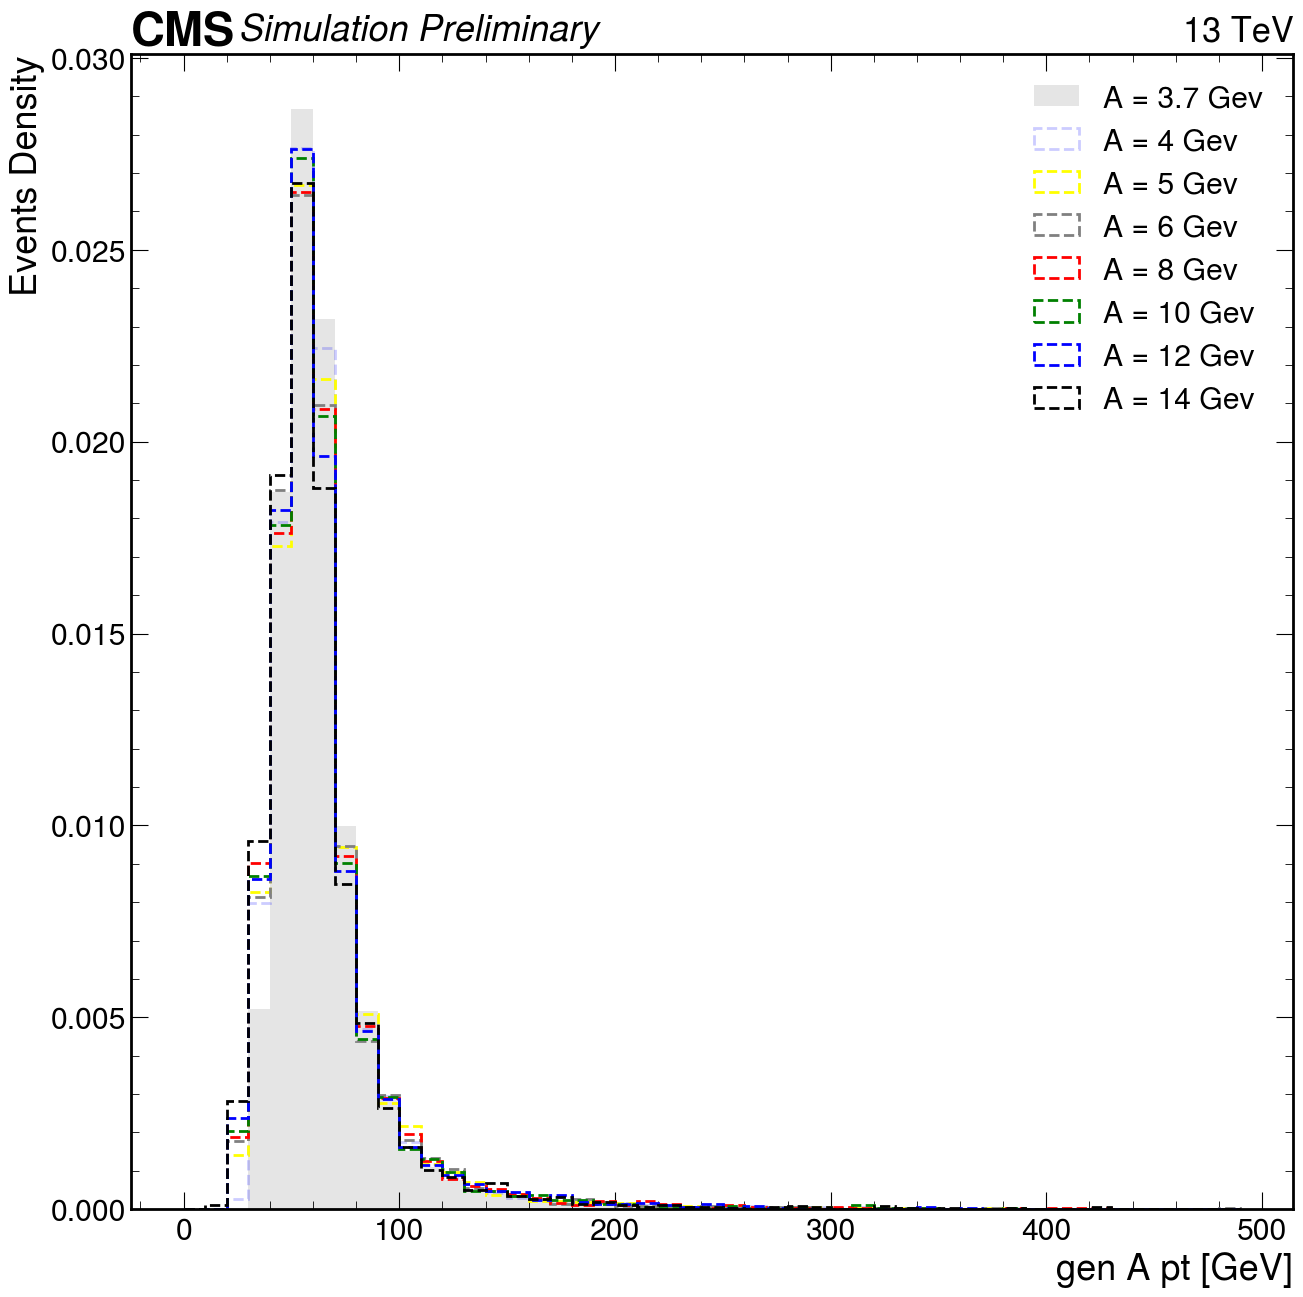

In [325]:
A1_pt3p7 = RHTree3p7.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A1_pt4 = RHTree4.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A1_pt5 = RHTree5.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A1_pt6 = RHTree6.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A1_pt8 = RHTree8.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A1_pt10 = RHTree10.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A1_pt12 = RHTree12.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A1_pt14 = RHTree14.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_pt3p7,bins=np.arange(0,500,10),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(A1_pt4,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(A1_pt5,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(A1_pt6,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(A1_pt8,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(A1_pt10,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(A1_pt12,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(A1_pt14,bins=np.arange(0,500,10),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)


plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

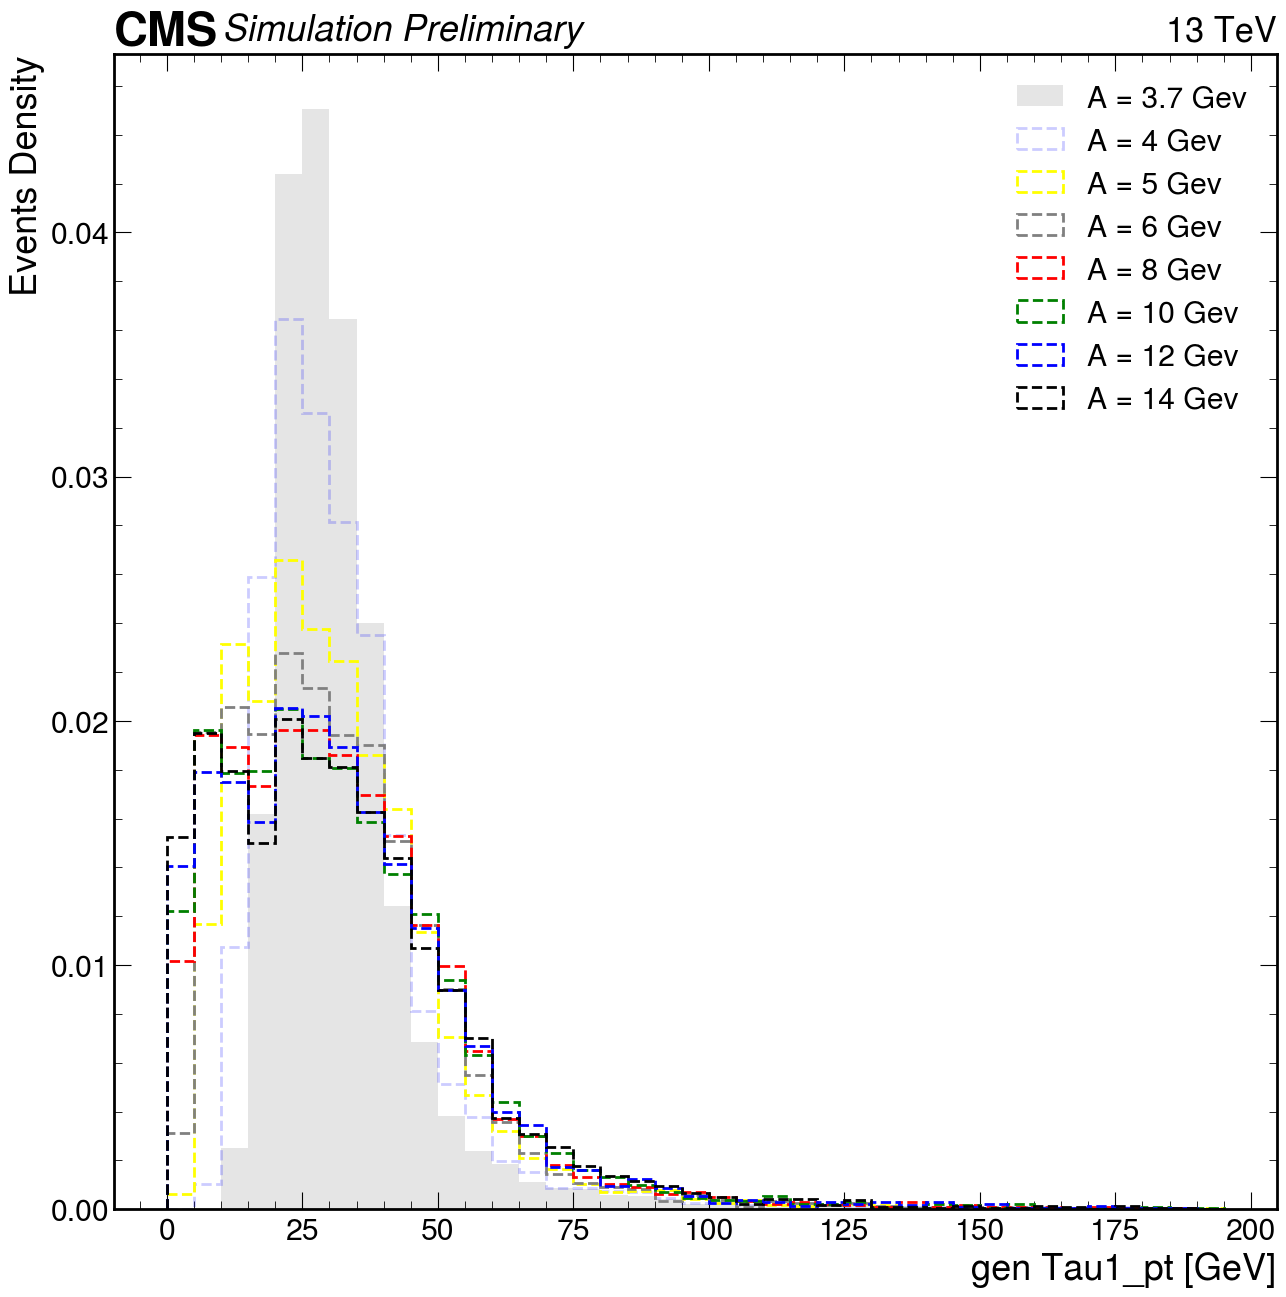

In [326]:
Tau1_pt3p7 = RHTree3p7.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau1_pt4 = RHTree4.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau1_pt5 = RHTree5.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau1_pt6 = RHTree6.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau1_pt8 = RHTree8.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau1_pt10 = RHTree10.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau1_pt12 = RHTree12.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau1_pt14 = RHTree14.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt3p7,bins=np.arange(0,200,5),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(Tau1_pt4,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(Tau1_pt5,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(Tau1_pt6,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(Tau1_pt8,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(Tau1_pt10,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(Tau1_pt12,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(Tau1_pt14,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Tau1_pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau1_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

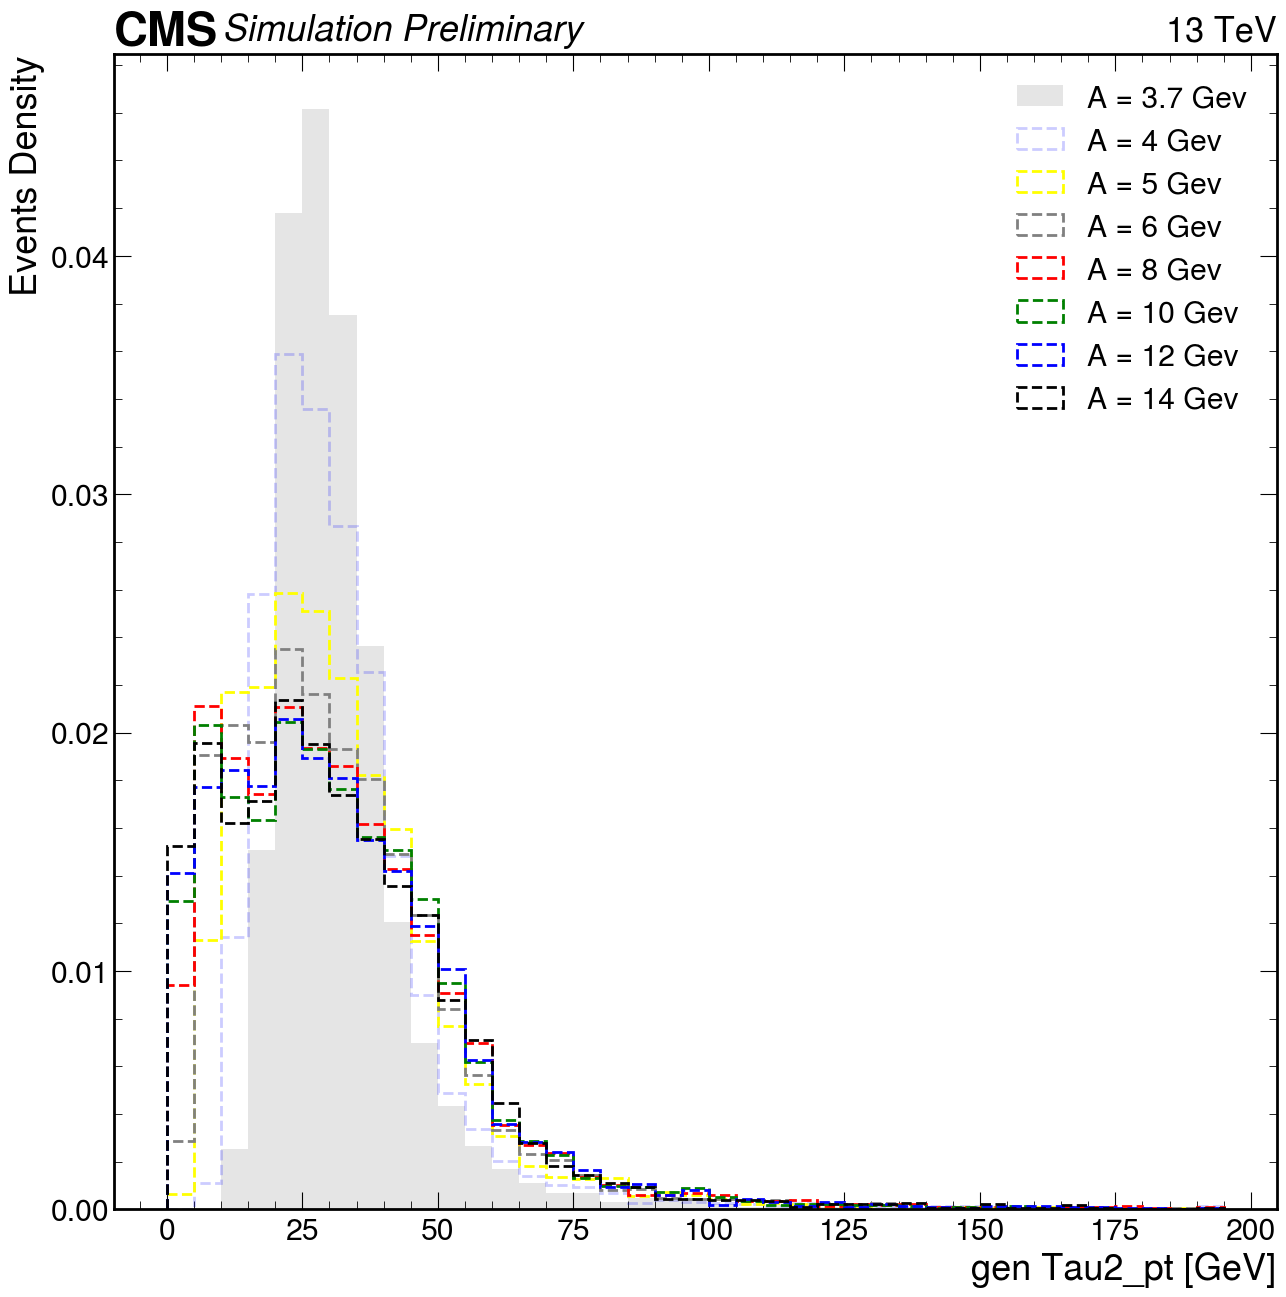

In [327]:
Tau2_pt3p7 = RHTree3p7.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau2_pt4 = RHTree4.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau2_pt5 = RHTree5.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau2_pt6 = RHTree6.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau2_pt8 = RHTree8.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau2_pt10 = RHTree10.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau2_pt12 = RHTree12.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau2_pt14 = RHTree14.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau2_pt3p7,bins=np.arange(0,200,5),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(Tau2_pt4,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(Tau2_pt5,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(Tau2_pt6,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(Tau2_pt8,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(Tau2_pt10,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(Tau2_pt12,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(Tau2_pt14,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Tau2_pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau2_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

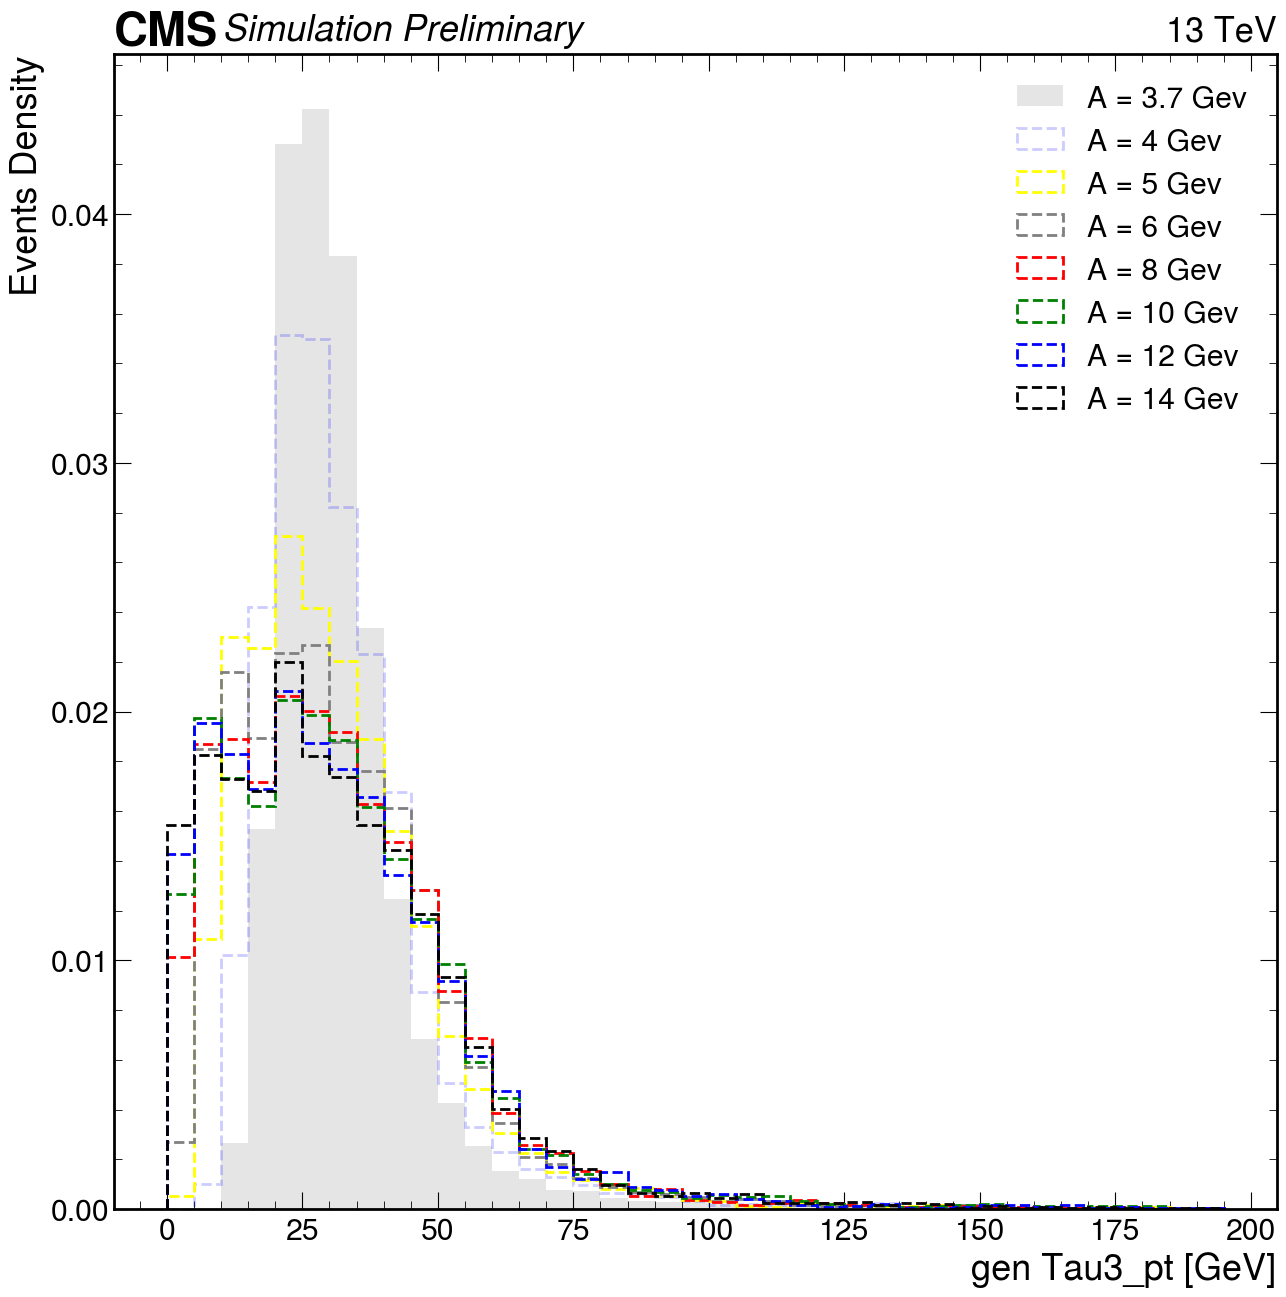

In [328]:
Tau3_pt3p7 = RHTree3p7.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau3_pt4 = RHTree4.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau3_pt5 = RHTree5.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau3_pt6 = RHTree6.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau3_pt8 = RHTree8.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau3_pt10 = RHTree10.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau3_pt12 = RHTree12.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau3_pt14 = RHTree14.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau3_pt3p7,bins=np.arange(0,200,5),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(Tau3_pt4,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(Tau3_pt5,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(Tau3_pt6,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(Tau3_pt8,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(Tau3_pt10,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(Tau3_pt12,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(Tau3_pt14,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Tau3_pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau3_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

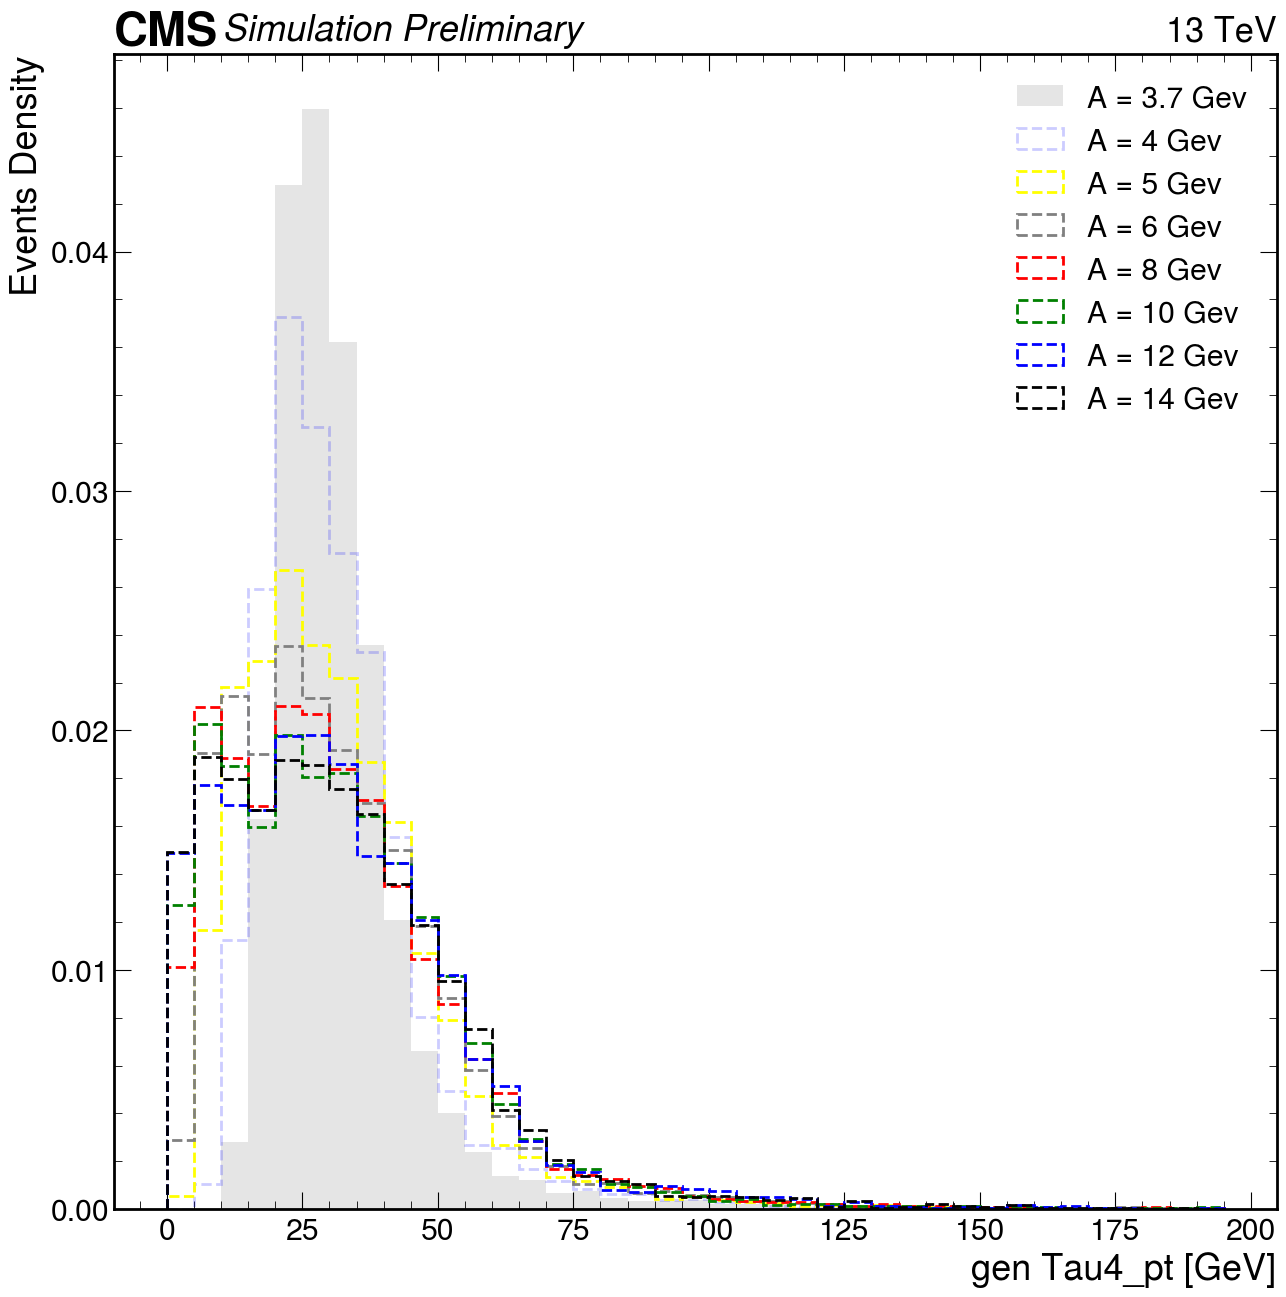

In [329]:
Tau4_pt3p7 = RHTree3p7.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
Tau4_pt4 = RHTree4.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
Tau4_pt5 = RHTree5.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
Tau4_pt6 = RHTree6.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
Tau4_pt8 = RHTree8.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
Tau4_pt10 = RHTree10.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
Tau4_pt12 = RHTree12.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
Tau4_pt14 = RHTree14.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau4_pt3p7,bins=np.arange(0,200,5),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(Tau4_pt4,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(Tau4_pt5,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(Tau4_pt6,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(Tau4_pt8,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(Tau4_pt10,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(Tau4_pt12,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(Tau4_pt14,bins=np.arange(0,200,5),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen Tau4_pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau4_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

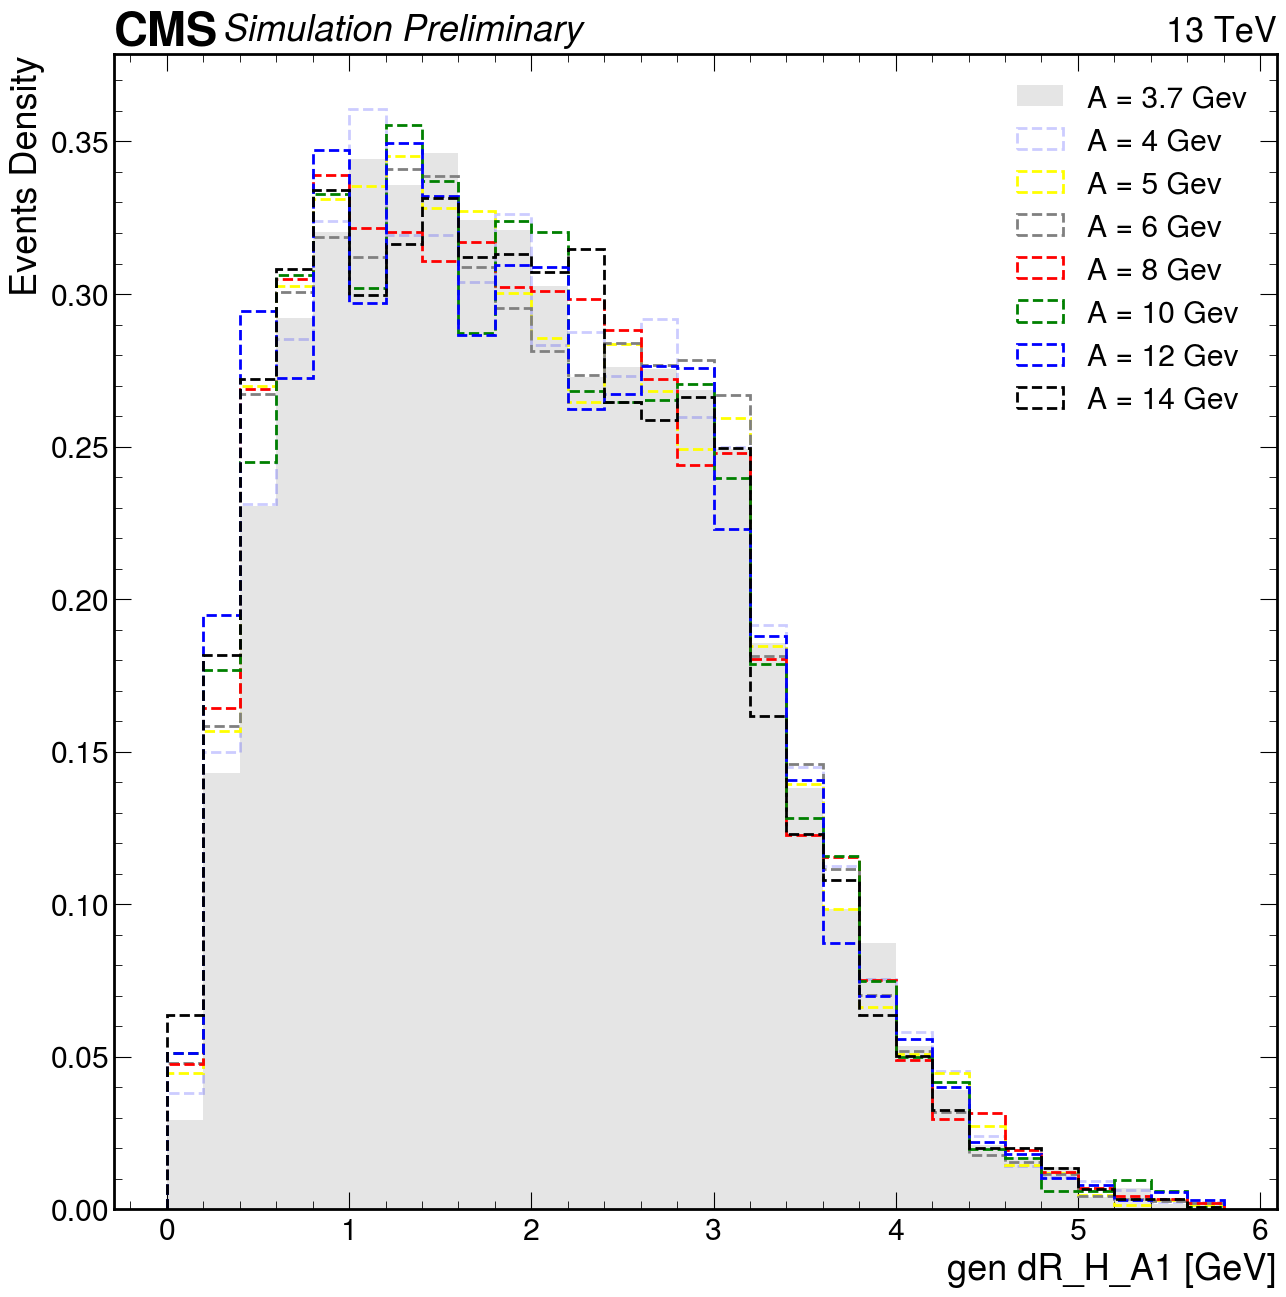

In [330]:
dR_H_A13p7 = RHTree3p7.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A14 = RHTree4.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A15 = RHTree5.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A16 = RHTree6.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A18 = RHTree8.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A110 = RHTree10.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A112 = RHTree12.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A114 = RHTree14.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_H_A13p7,bins=np.arange(0,6,.2),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(dR_H_A14,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(dR_H_A15,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(dR_H_A16,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(dR_H_A18,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(dR_H_A110,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(dR_H_A112,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(dR_H_A114,bins=np.arange(0,6,.2),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen dR_H_A1 [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_H_A1_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

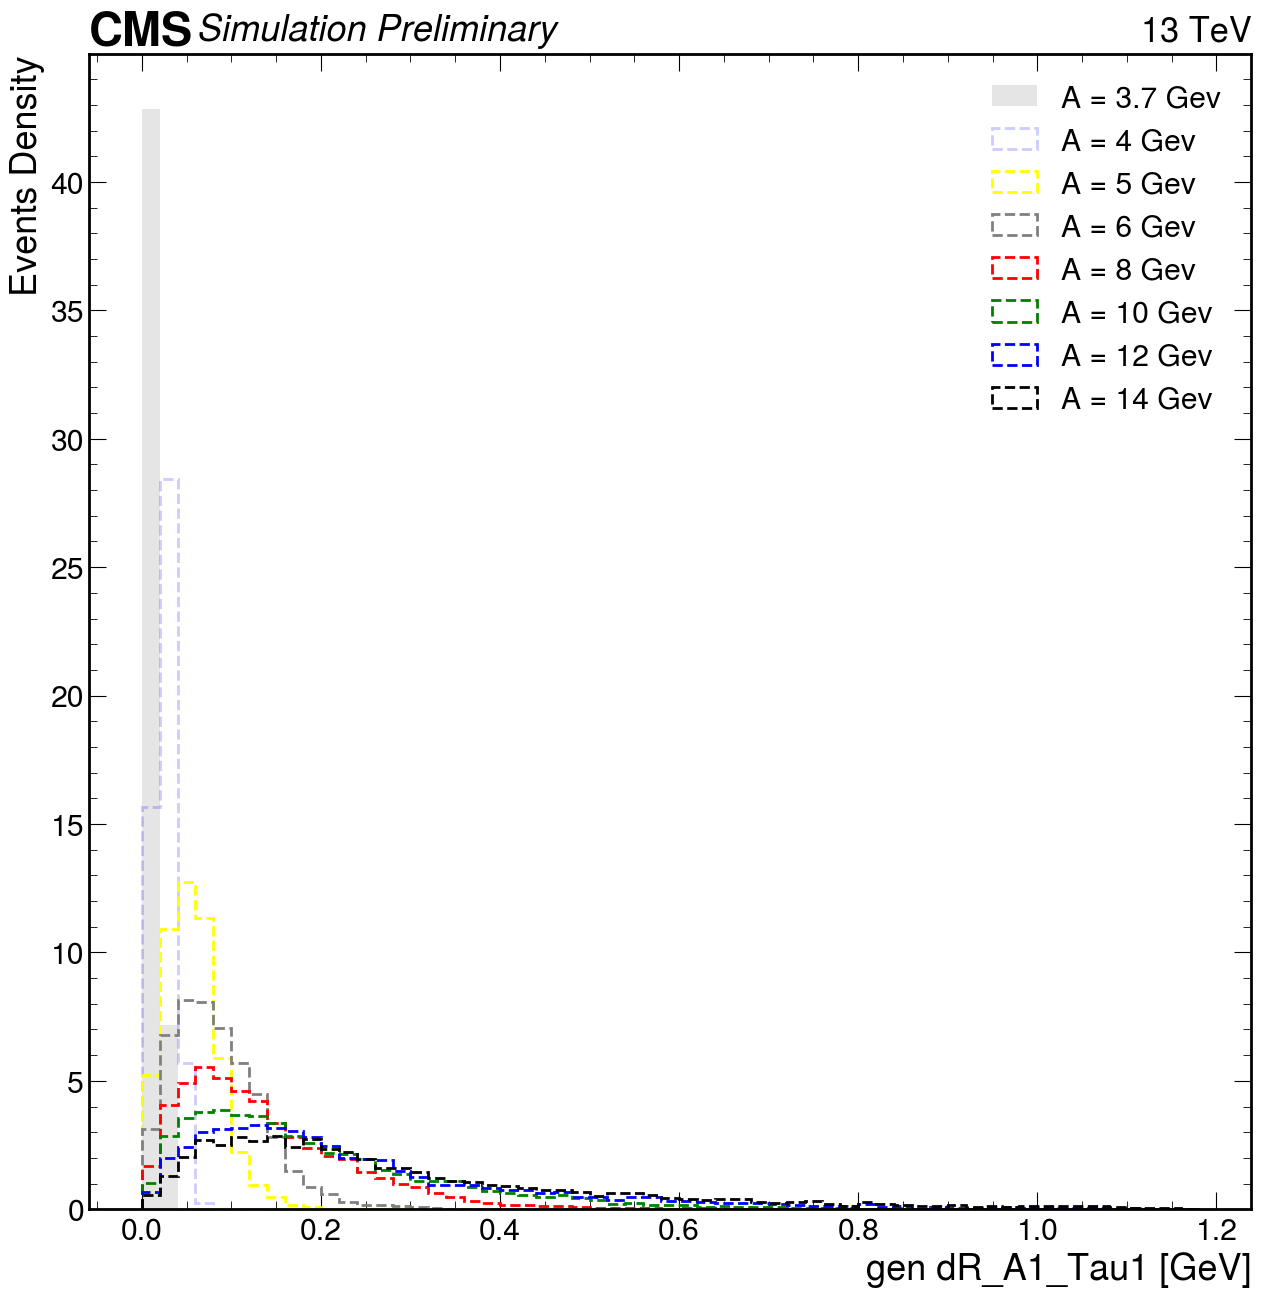

In [331]:
dR_A1_Tau13p7 = RHTree3p7.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau14 = RHTree4.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau15 = RHTree5.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau16 = RHTree6.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau18 = RHTree8.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau110 = RHTree10.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau112 = RHTree12.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau114 = RHTree14.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_A1_Tau13p7,bins=np.arange(0,1.2,.02),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(dR_A1_Tau14,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(dR_A1_Tau15,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(dR_A1_Tau16,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(dR_A1_Tau18,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(dR_A1_Tau110,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(dR_A1_Tau112,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(dR_A1_Tau114,bins=np.arange(0,1.2,.02),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen dR_A1_Tau1 [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A1_Tau1_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

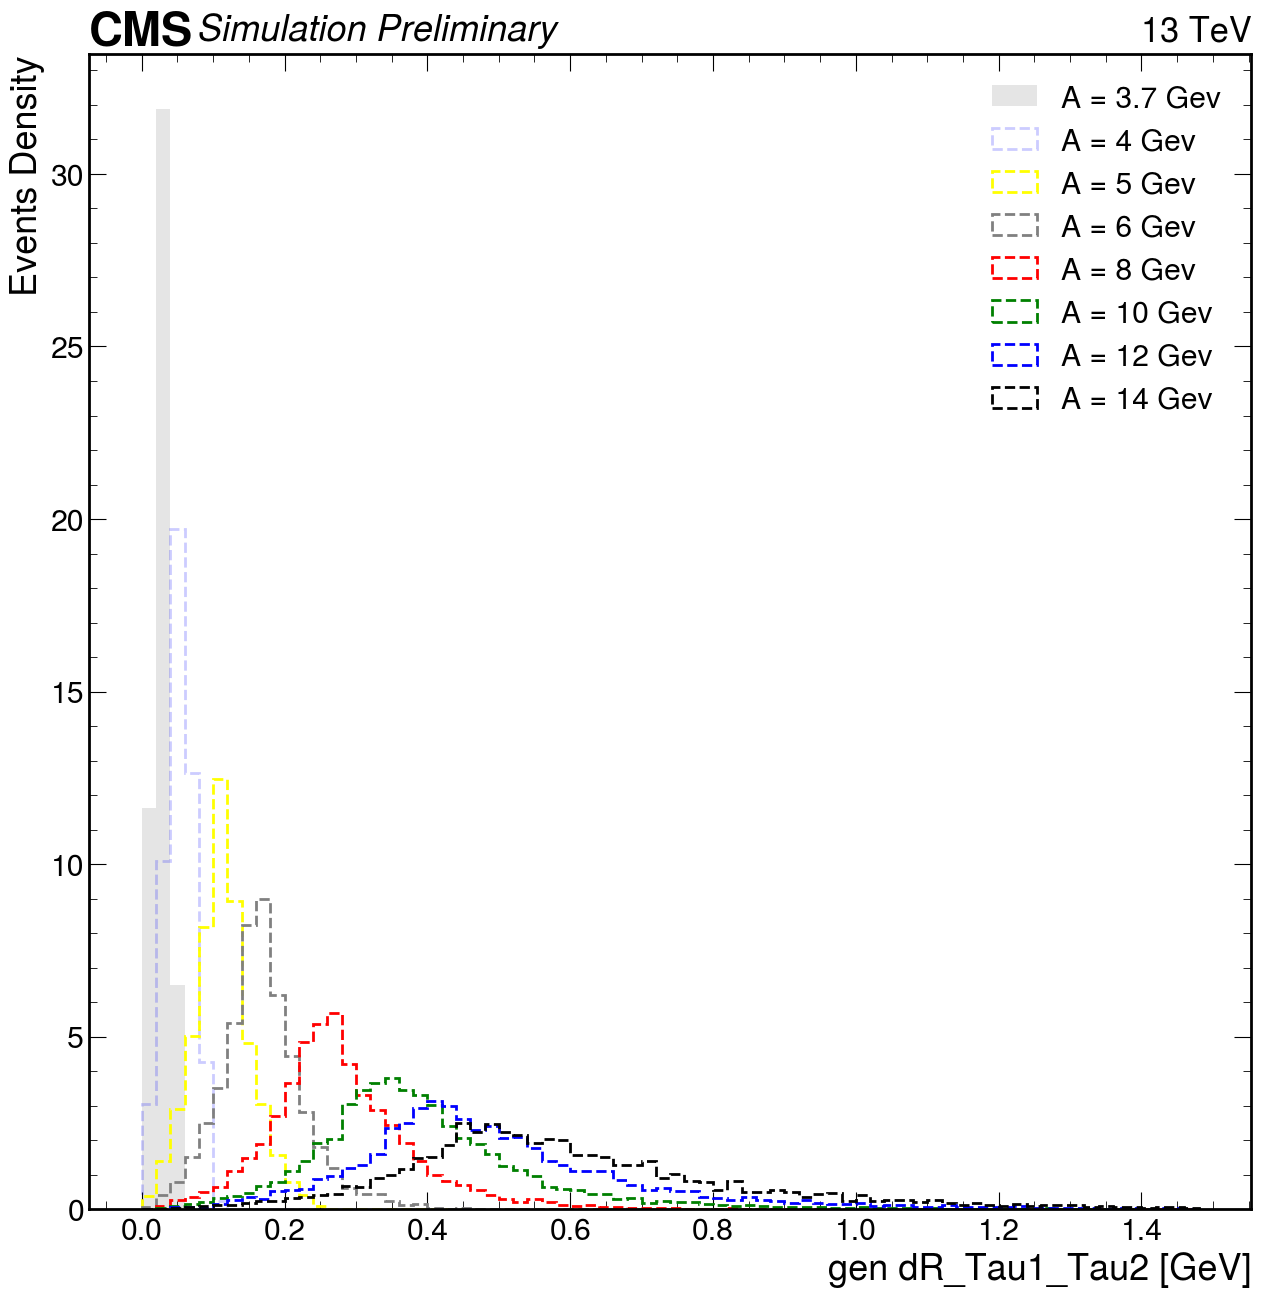

In [332]:
dR_Tau1_Tau23p7 = RHTree3p7.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau24 = RHTree4.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau25 = RHTree5.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau26 = RHTree6.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau28 = RHTree8.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau210 = RHTree10.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau212 = RHTree12.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau214 = RHTree14.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_Tau1_Tau23p7,bins=np.arange(0,1.5,.02),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(dR_Tau1_Tau24,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(dR_Tau1_Tau25,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(dR_Tau1_Tau26,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(dR_Tau1_Tau28,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(dR_Tau1_Tau210,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(dR_Tau1_Tau212,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(dR_Tau1_Tau214,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen dR_Tau1_Tau2 [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau1_Tau2_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

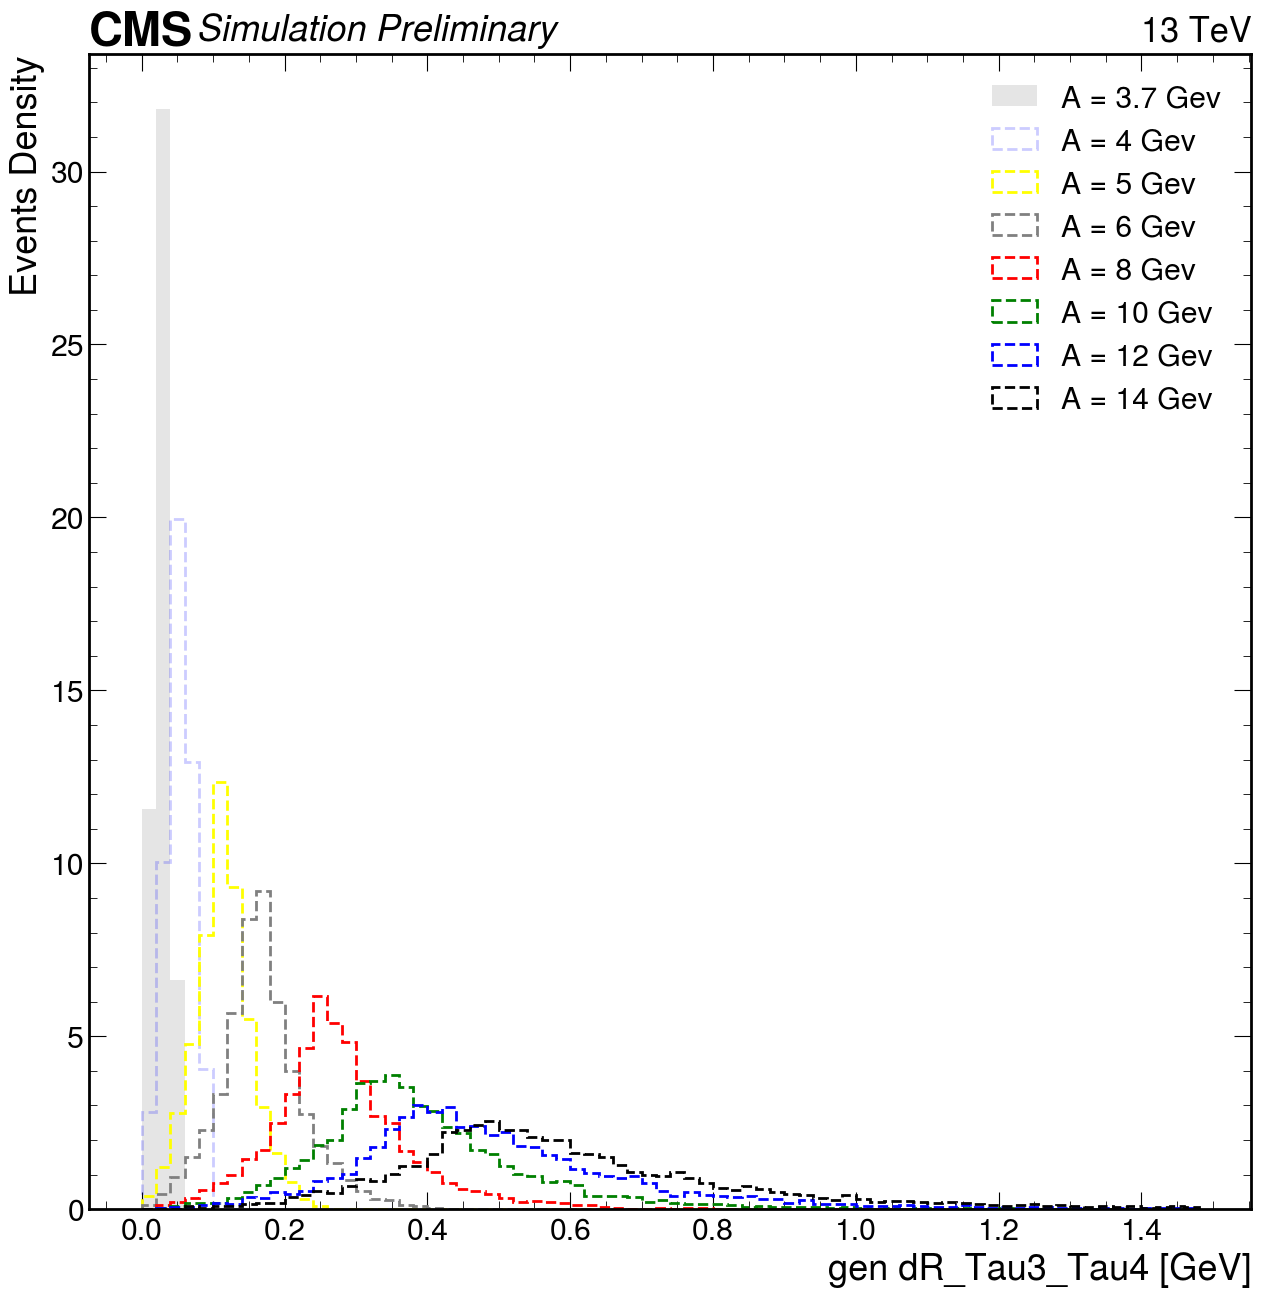

In [333]:
dR_Tau3_Tau43p7 = RHTree3p7.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_Tau3_Tau44 = RHTree4.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_Tau3_Tau45 = RHTree5.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_Tau3_Tau46 = RHTree6.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_Tau3_Tau48 = RHTree8.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_Tau3_Tau410 = RHTree10.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_Tau3_Tau412 = RHTree12.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
dR_Tau3_Tau414 = RHTree14.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']


fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_Tau3_Tau43p7,bins=np.arange(0,1.5,.02),color='grey',alpha=0.2,label="A = 3.7 Gev", density = True)
plt.hist(dR_Tau3_Tau44,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',alpha=0.2, label="A = 4 Gev",density = True)
plt.hist(dR_Tau3_Tau45,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='yellow',label="A = 5 Gev",density = True)
plt.hist(dR_Tau3_Tau46,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='grey',label="A = 6 Gev",density = True)
plt.hist(dR_Tau3_Tau48,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='r',label="A = 8 Gev",density = True)
plt.hist(dR_Tau3_Tau410,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='g',label="A = 10 Gev",density = True)
plt.hist(dR_Tau3_Tau412,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='b',label="A = 12 Gev",density = True)
plt.hist(dR_Tau3_Tau414,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2,color='black',label="A = 14 Gev",density = True)

plt.legend()
plt.ylabel("Events Density")
plt.xlabel("gen dR_Tau3_Tau4 [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau3_Tau4_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()